# Dayton Real Estate Market EDA

**Goals**

- Look at relationships between features
- Establish a basic a understanding of the relationships
- Narrow down features to find ones that would be more useful in a deeper analysis
- Get ideas for a more involved analysis.

Load Packages

In [4]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import Redfin Metro Area Dataset. Contains Market Data since 2013

In [5]:
redfin_df = pd.read_csv(r"C:\Users\wilke\Downloads\redfin_metro_market_tracker.tsv000.gz",
                        compression='gzip',sep = '\t',header = 0,quotechar='"')

In [6]:
# get only Ohio records

oh_bool = []

for i in redfin_df['parent_metro_region']:
    bool = 'OH' in i
    oh_bool.append(bool)

oh_metrics = redfin_df[oh_bool]    

In [7]:
oh_metrics.sort_values(['parent_metro_region','period_begin'])

period_begin  period_end  period_duration region_type  region_type_id  \
13072    2012-01-01  2012-01-31               30       metro              -2   
155928   2012-01-01  2012-01-31               30       metro              -2   
189842   2012-01-01  2012-01-31               30       metro              -2   
246828   2012-01-01  2012-01-31               30       metro              -2   
330225   2012-01-01  2012-01-31               30       metro              -2   
...             ...         ...              ...         ...             ...   
213821   2023-04-01  2023-04-30               30       metro              -2   
78549    2023-05-01  2023-05-31               30       metro              -2   
154272   2023-05-01  2023-05-31               30       metro              -2   
312699   2023-05-01  2023-05-31               30       metro              -2   
317645   2023-05-01  2023-05-31               30       metro              -2   

        table_id is_seasonally_adjusted                     region  city  \
13072      10420                      f       Akron, OH metro area   NaN   
155928     10420                      f       Akron, OH metro area   NaN   
189842     10420                      f       Akron, OH metro area   NaN   
246828     10420                      f       Akron, OH metro area   NaN   
330225     10420                      f       Akron, OH metro area   NaN   
...          ...                    ...                        ...   ...   
213821     49780                      f  Zanesville, OH metro area   NaN   
78549      49780                      f  Zanesville, OH metro area   NaN   
154272     49780                      f  Zanesville, OH metro area   NaN   
312699     49780                      f  Zanesville, OH metro area   NaN   
317645     49780                      f  Zanesville, OH metro area   NaN   

        state  ... sold_above_list_yoy price_drops  price_drops_mom  \
13072     NaN  ...           -0.031343         NaN              NaN   
155928    NaN  ...           -0.125000         NaN              NaN   
189842    NaN  ...            0.070000         NaN              NaN   
246828    NaN  ...                 NaN         NaN              NaN   
330225    NaN  ...           -0.035880         NaN              NaN   
...       ...  ...                 ...         ...              ...   
213821    NaN  ...           -0.189678    0.223881         0.018752   
78549     NaN  ...           -0.086996    0.246753         0.039857   
154272    NaN  ...            0.000000    0.200000              NaN   
312699    NaN  ...           -0.074074    0.244755         0.020875   
317645    NaN  ...           -1.000000    0.500000              NaN   

        price_drops_yoy  off_market_in_two_weeks  off_market_in_two_weeks_mom  \
13072               NaN                 0.032086                    -0.017707   
155928              NaN                 0.000000                     0.000000   
189842              NaN                 0.000000                    -0.071429   
246828              NaN                      NaN                          NaN   
330225              NaN                 0.036364                    -0.014095   
...                 ...                      ...                          ...   
213821         0.118617                 0.347222                     0.019353   
78549          0.045570                 0.400000                     0.062162   
154272              NaN                 0.666667                     0.666667   
312699         0.032255                 0.381579                     0.034357   
317645              NaN                 1.000000                          NaN   

        off_market_in_two_weeks_yoy  parent_metro_region  \
13072                      0.021275            Akron, OH   
155928                     0.000000            Akron, OH   
189842                     0.000000            Akron, OH   
246828                          NaN            Akron, OH   
330225 

In [8]:
#All features in dataset

oh_metrics.columns

Index(['period_begin', 'period_end', 'period_duration', 'region_type',
       'region_type_id', 'table_id', 'is_seasonally_adjusted', 'region',
       'city', 'state', 'state_code', 'property_type', 'property_type_id',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom',
 

Heatmap to get a look at correlated variables

C:\Users\wilke\AppData\Local\Temp\ipykernel_47604\1925643702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(oh_metrics.corr())


<Axes: >

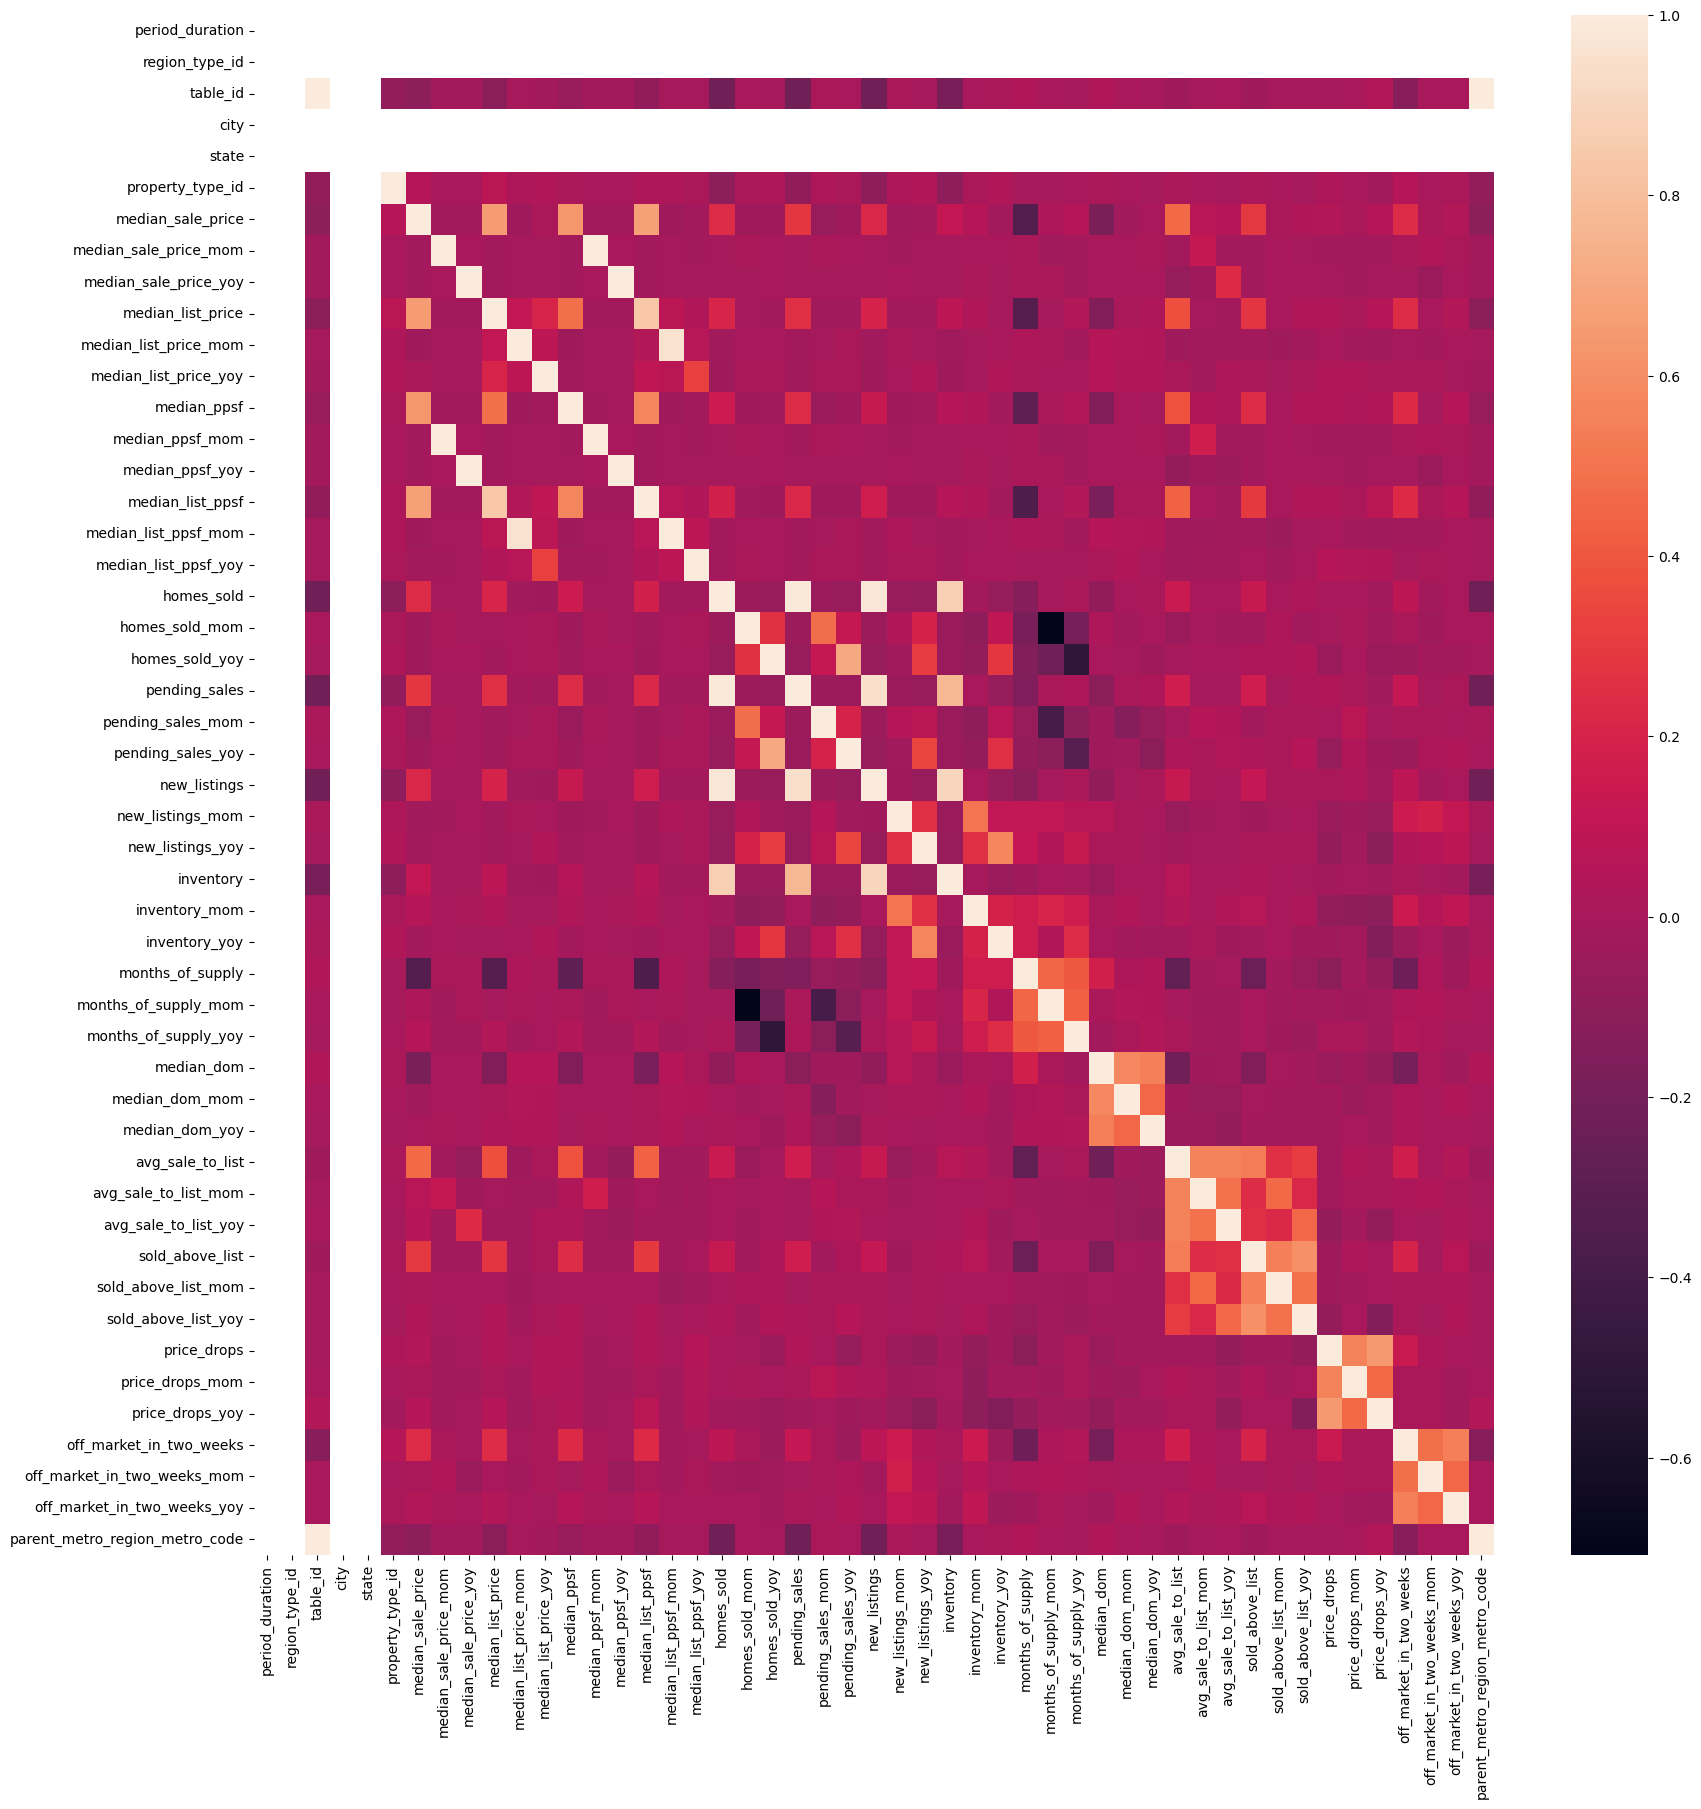

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(oh_metrics.corr())

# metrics to keep based on relationships

- median_list_price
- median_sale_price
- months_of_supply
- months_of_supply_mom
- months_of_supply_yoy
- homes_sold
- homes_sold_mom
- homes_sold_yoy
- median_list_ppsf
- median_list_ppsf_mom
- median_list_ppsf_yoy
- inventory
- inventory_mom
- inventory_yoy
- avg_sale_to_list
- sold_above_list
- sold_above_list_mom
- sold_above_list_yoy
- off_market_in_two_weeks
- price_drops
- pending_sales
- pending_sale_mom
- pending_sales_yoy


Histogram to visualize the distributions of all features

In [30]:
metrics_df = oh_metrics[[
    'period_begin',
    'parent_metro_region',
    'property_type',
    'median_list_price',
    'median_sale_price',
    'median_sale_price_mom',
    'median_sale_price_yoy',
    'months_of_supply',
    'months_of_supply_mom',
    'months_of_supply_yoy',
    'homes_sold',
    'homes_sold_mom',
    'homes_sold_yoy',
    'median_list_ppsf',
    'median_list_ppsf_mom',
    'median_list_ppsf_yoy',
    'inventory',
    'inventory_mom',
    'inventory_yoy',
    'avg_sale_to_list',
    'sold_above_list',
    'sold_above_list_mom',
    'sold_above_list_yoy',
    'off_market_in_two_weeks',
    'price_drops',
    'pending_sales',
    'pending_sales_mom',
    'pending_sales_yoy'
]]

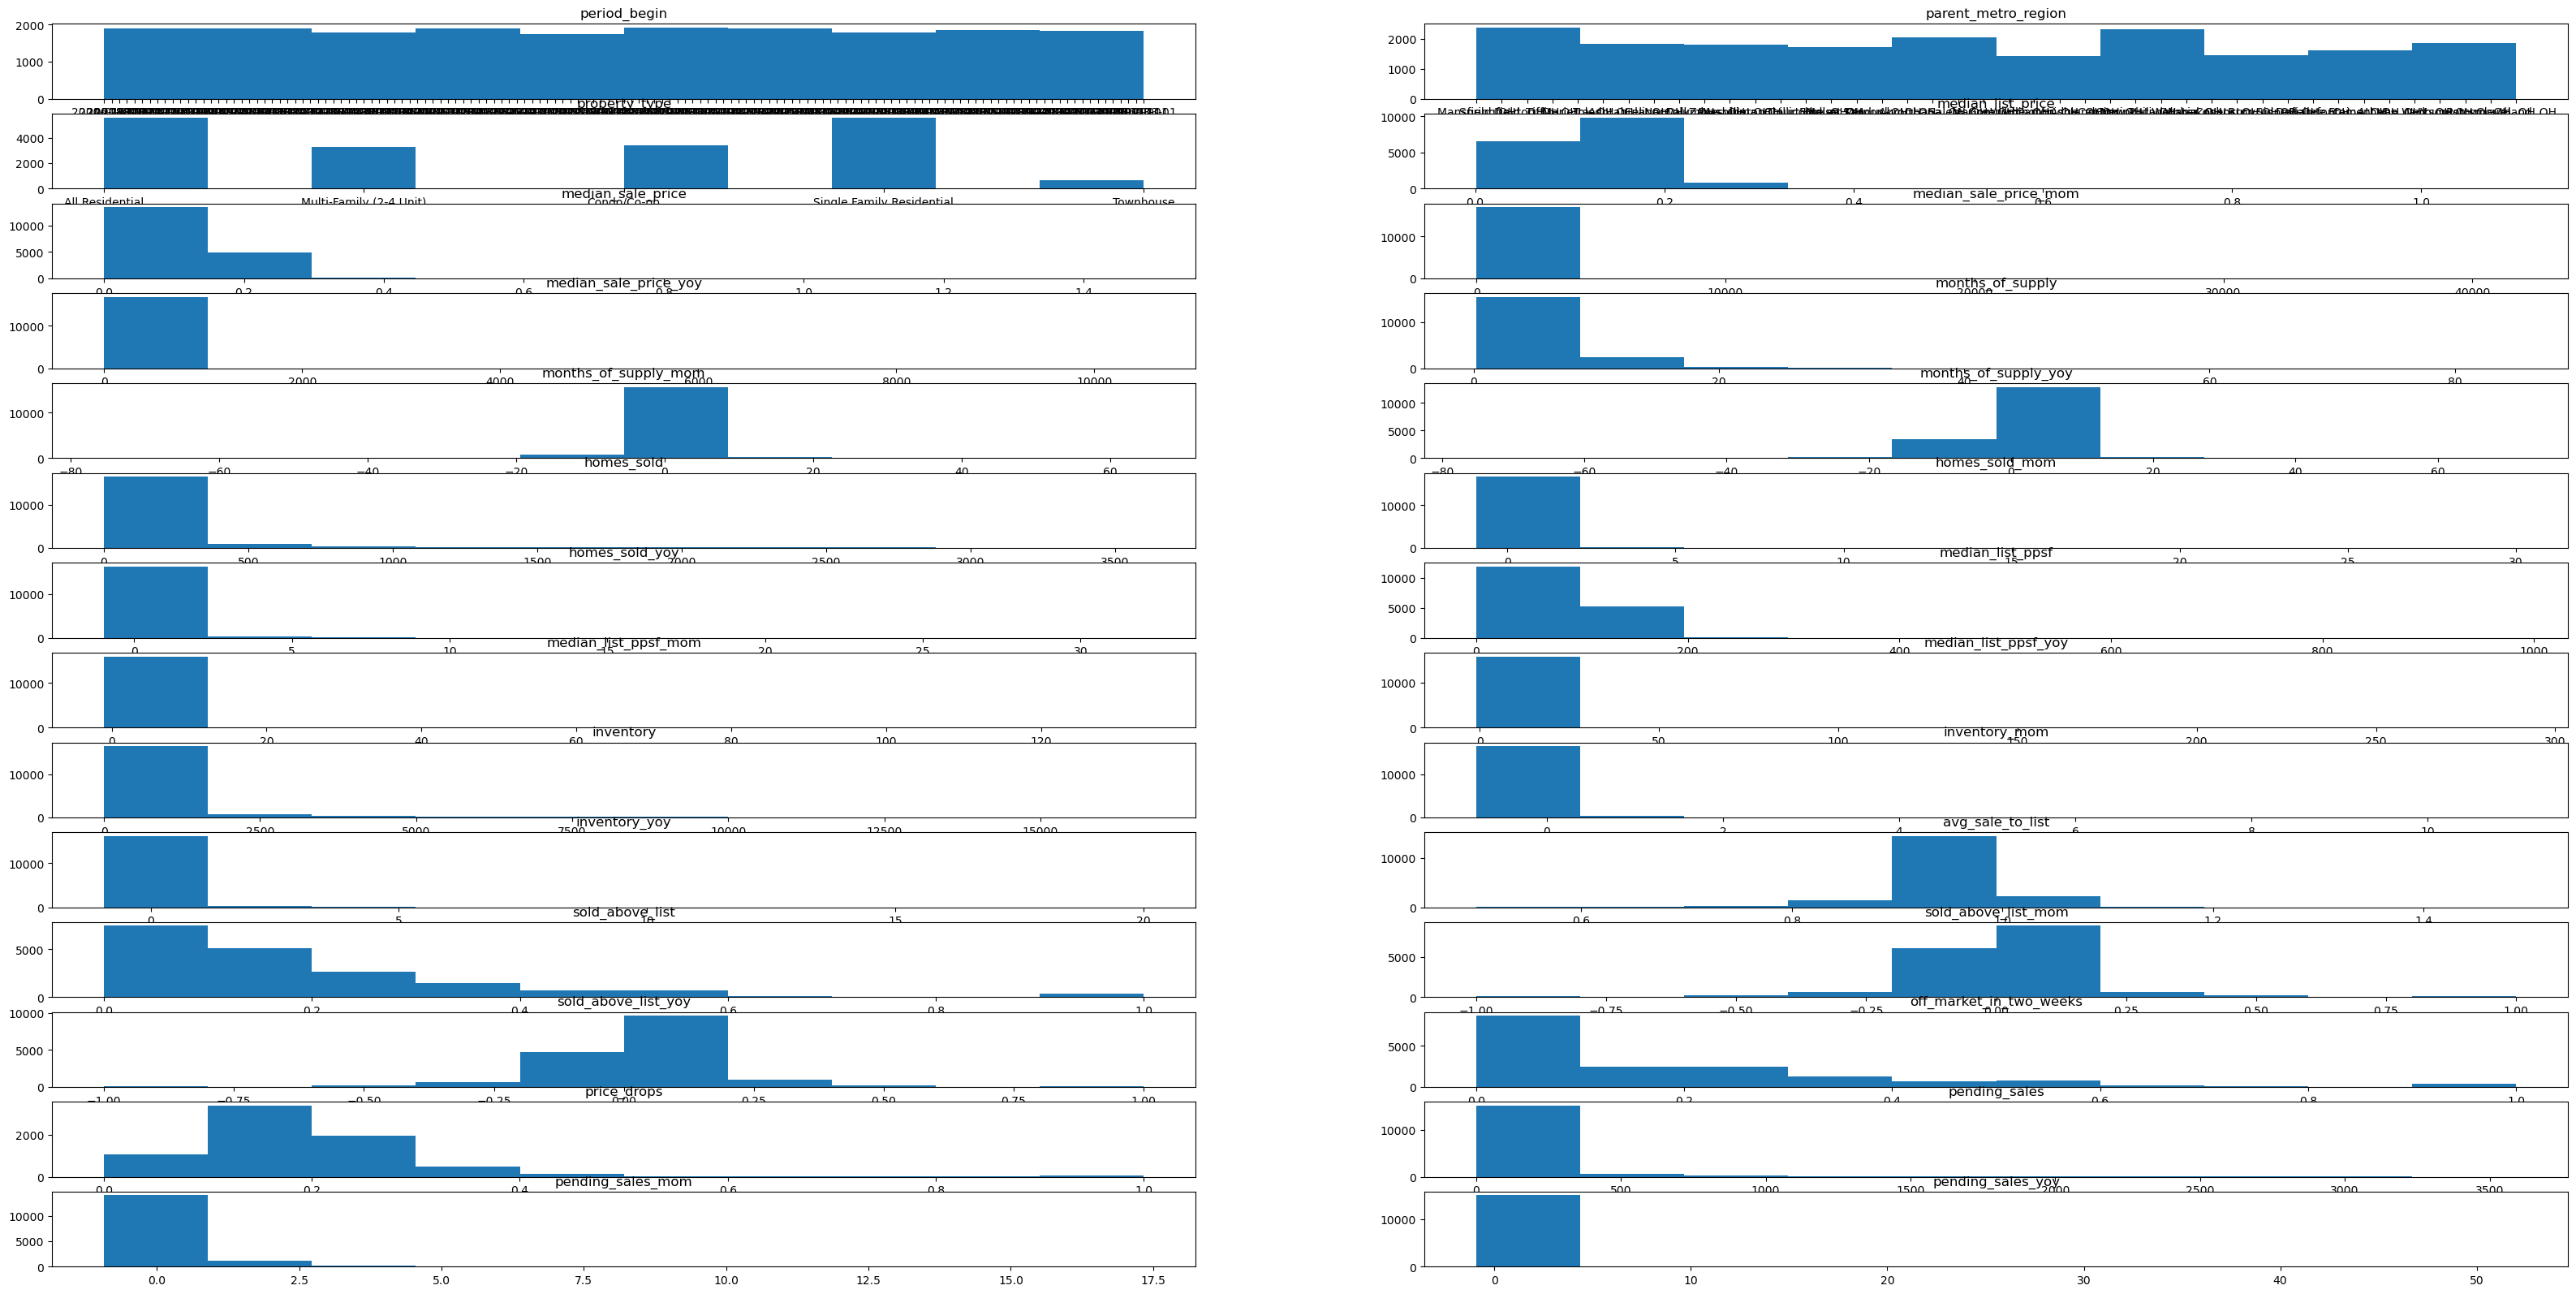

In [31]:
#Visualize a histogram of all metrics to see distributions

ind = 1
plt.figure(figsize=(40,40))

for i in metrics_df.columns:
    plt.subplot(len(metrics_df.columns),2,ind)
    plt.hist(metrics_df[i])
    plt.title(i)
    ind += 1

- All features are heavily right skewed except price_drops and pending_sales_mom which is typical of real estate metrics

In [32]:
#Split dataset into dayton marekt

dayton_market = metrics_df[metrics_df['parent_metro_region'] == 'Dayton, OH']


# Dayton Market EDA

In [33]:
dayton_townhouse = dayton_market[dayton_market['property_type'] == 'Townhouse'].sort_values('period_begin')
dayton_family_home = dayton_market[dayton_market['property_type'] == 'Single Family Residential'].sort_values('period_begin')
dayton_condo = dayton_market[dayton_market['property_type'] == 'Condo/Co-op'].sort_values('period_begin')
dayton_multi_family = dayton_market[dayton_market['property_type'] == 'Multi-Family (2-4 Unit)'].sort_values('period_begin')
dayton_residential = dayton_market[dayton_market['property_type'] == 'All Residential'].sort_values('period_begin')

## Time-Series look at metrics of each specific property type

### Townhouses

C:\Users\wilke\AppData\Local\Temp\ipykernel_42968\3672131972.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_townhouse['period_begin'],rotation = 90)


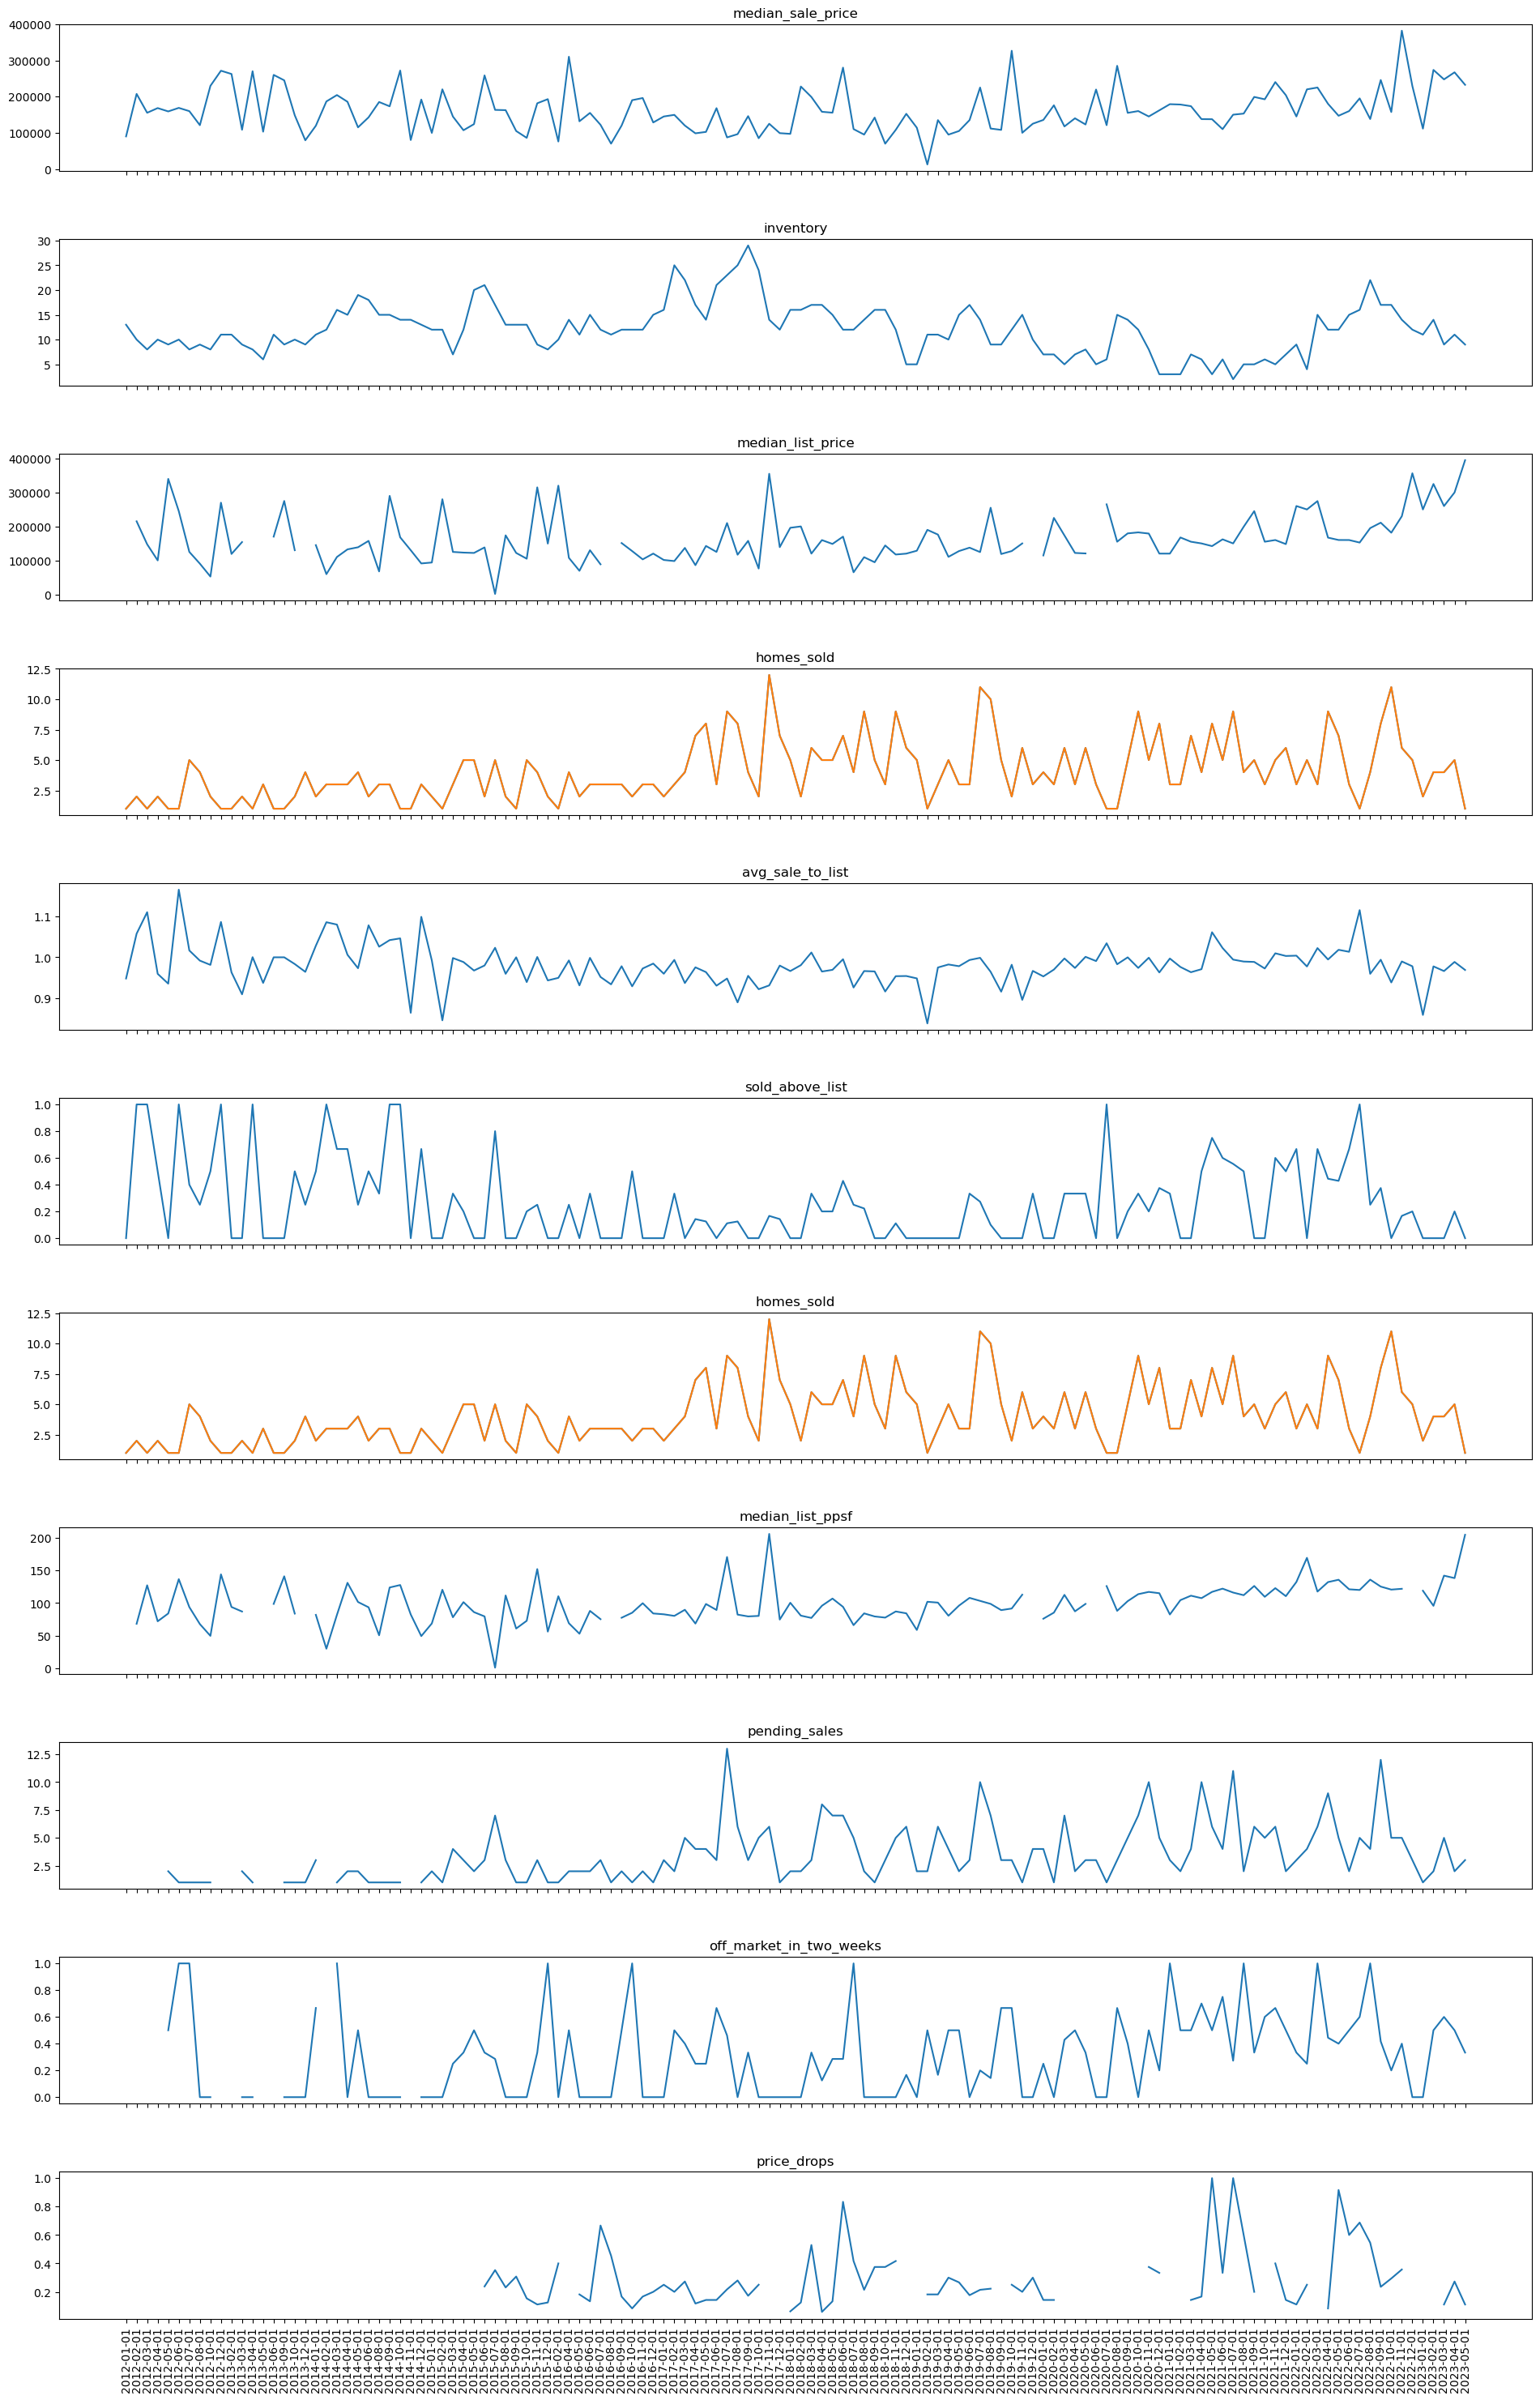

In [113]:
metrics = [ 'median_sale_price',
            'inventory',
            'median_list_price',
            'homes_sold',
            'avg_sale_to_list',
            'sold_above_list',
            'homes_sold',
            'median_list_ppsf',
            'pending_sales',
            'off_market_in_two_weeks',
            'price_drops',
            ]



fig, ax = plt.subplots(11,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics):
    ax[ind].plot(dayton_townhouse['period_begin'],dayton_townhouse[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_townhouse['period_begin'],rotation = 90)



### Single Family Homes

C:\Users\wilke\AppData\Local\Temp\ipykernel_42968\4127881422.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)


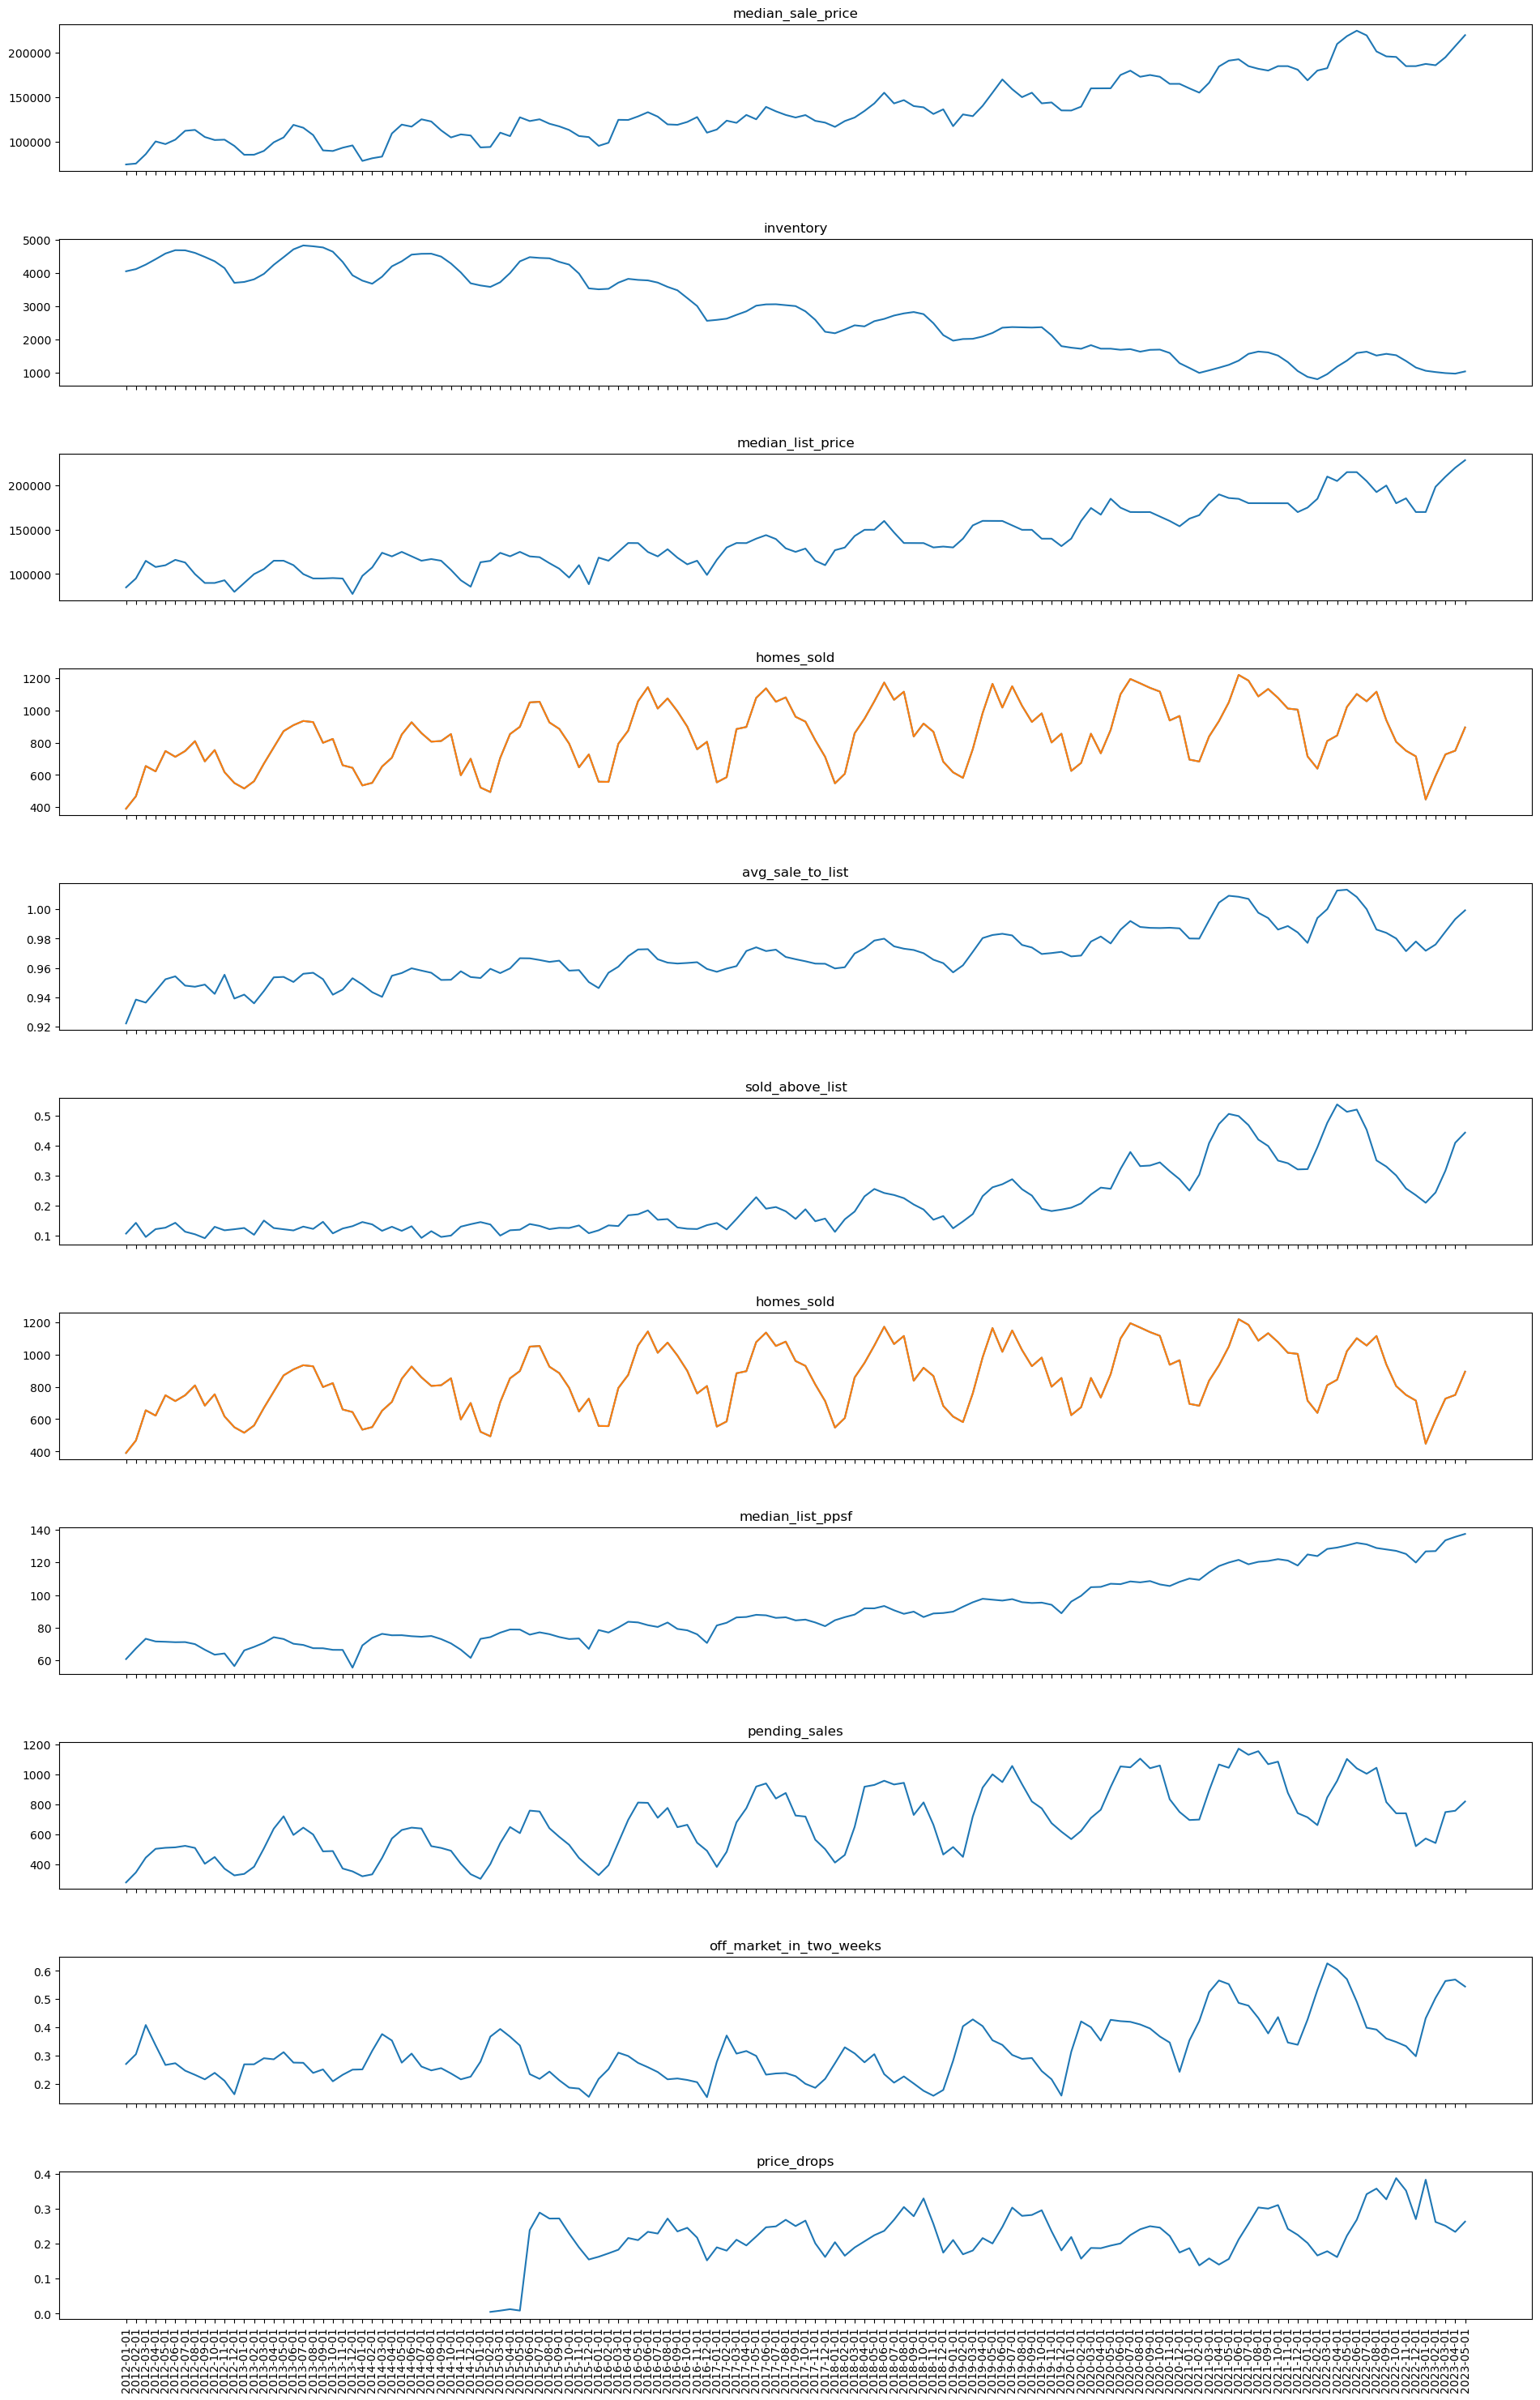

In [130]:

metrics = [ 'median_sale_price',
            'inventory',
            'median_list_price',
            'homes_sold',
            'avg_sale_to_list',
            'sold_above_list',
            'homes_sold',
            'median_list_ppsf',
            'pending_sales',
            'off_market_in_two_weeks',
            'price_drops',
            ]



fig, ax = plt.subplots(11,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics):
    ax[ind].plot(dayton_family_home['period_begin'],dayton_family_home[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)

### Condo/Co-op

C:\Users\wilke\AppData\Local\Temp\ipykernel_42968\1762790433.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_condo['period_begin'],rotation = 90)


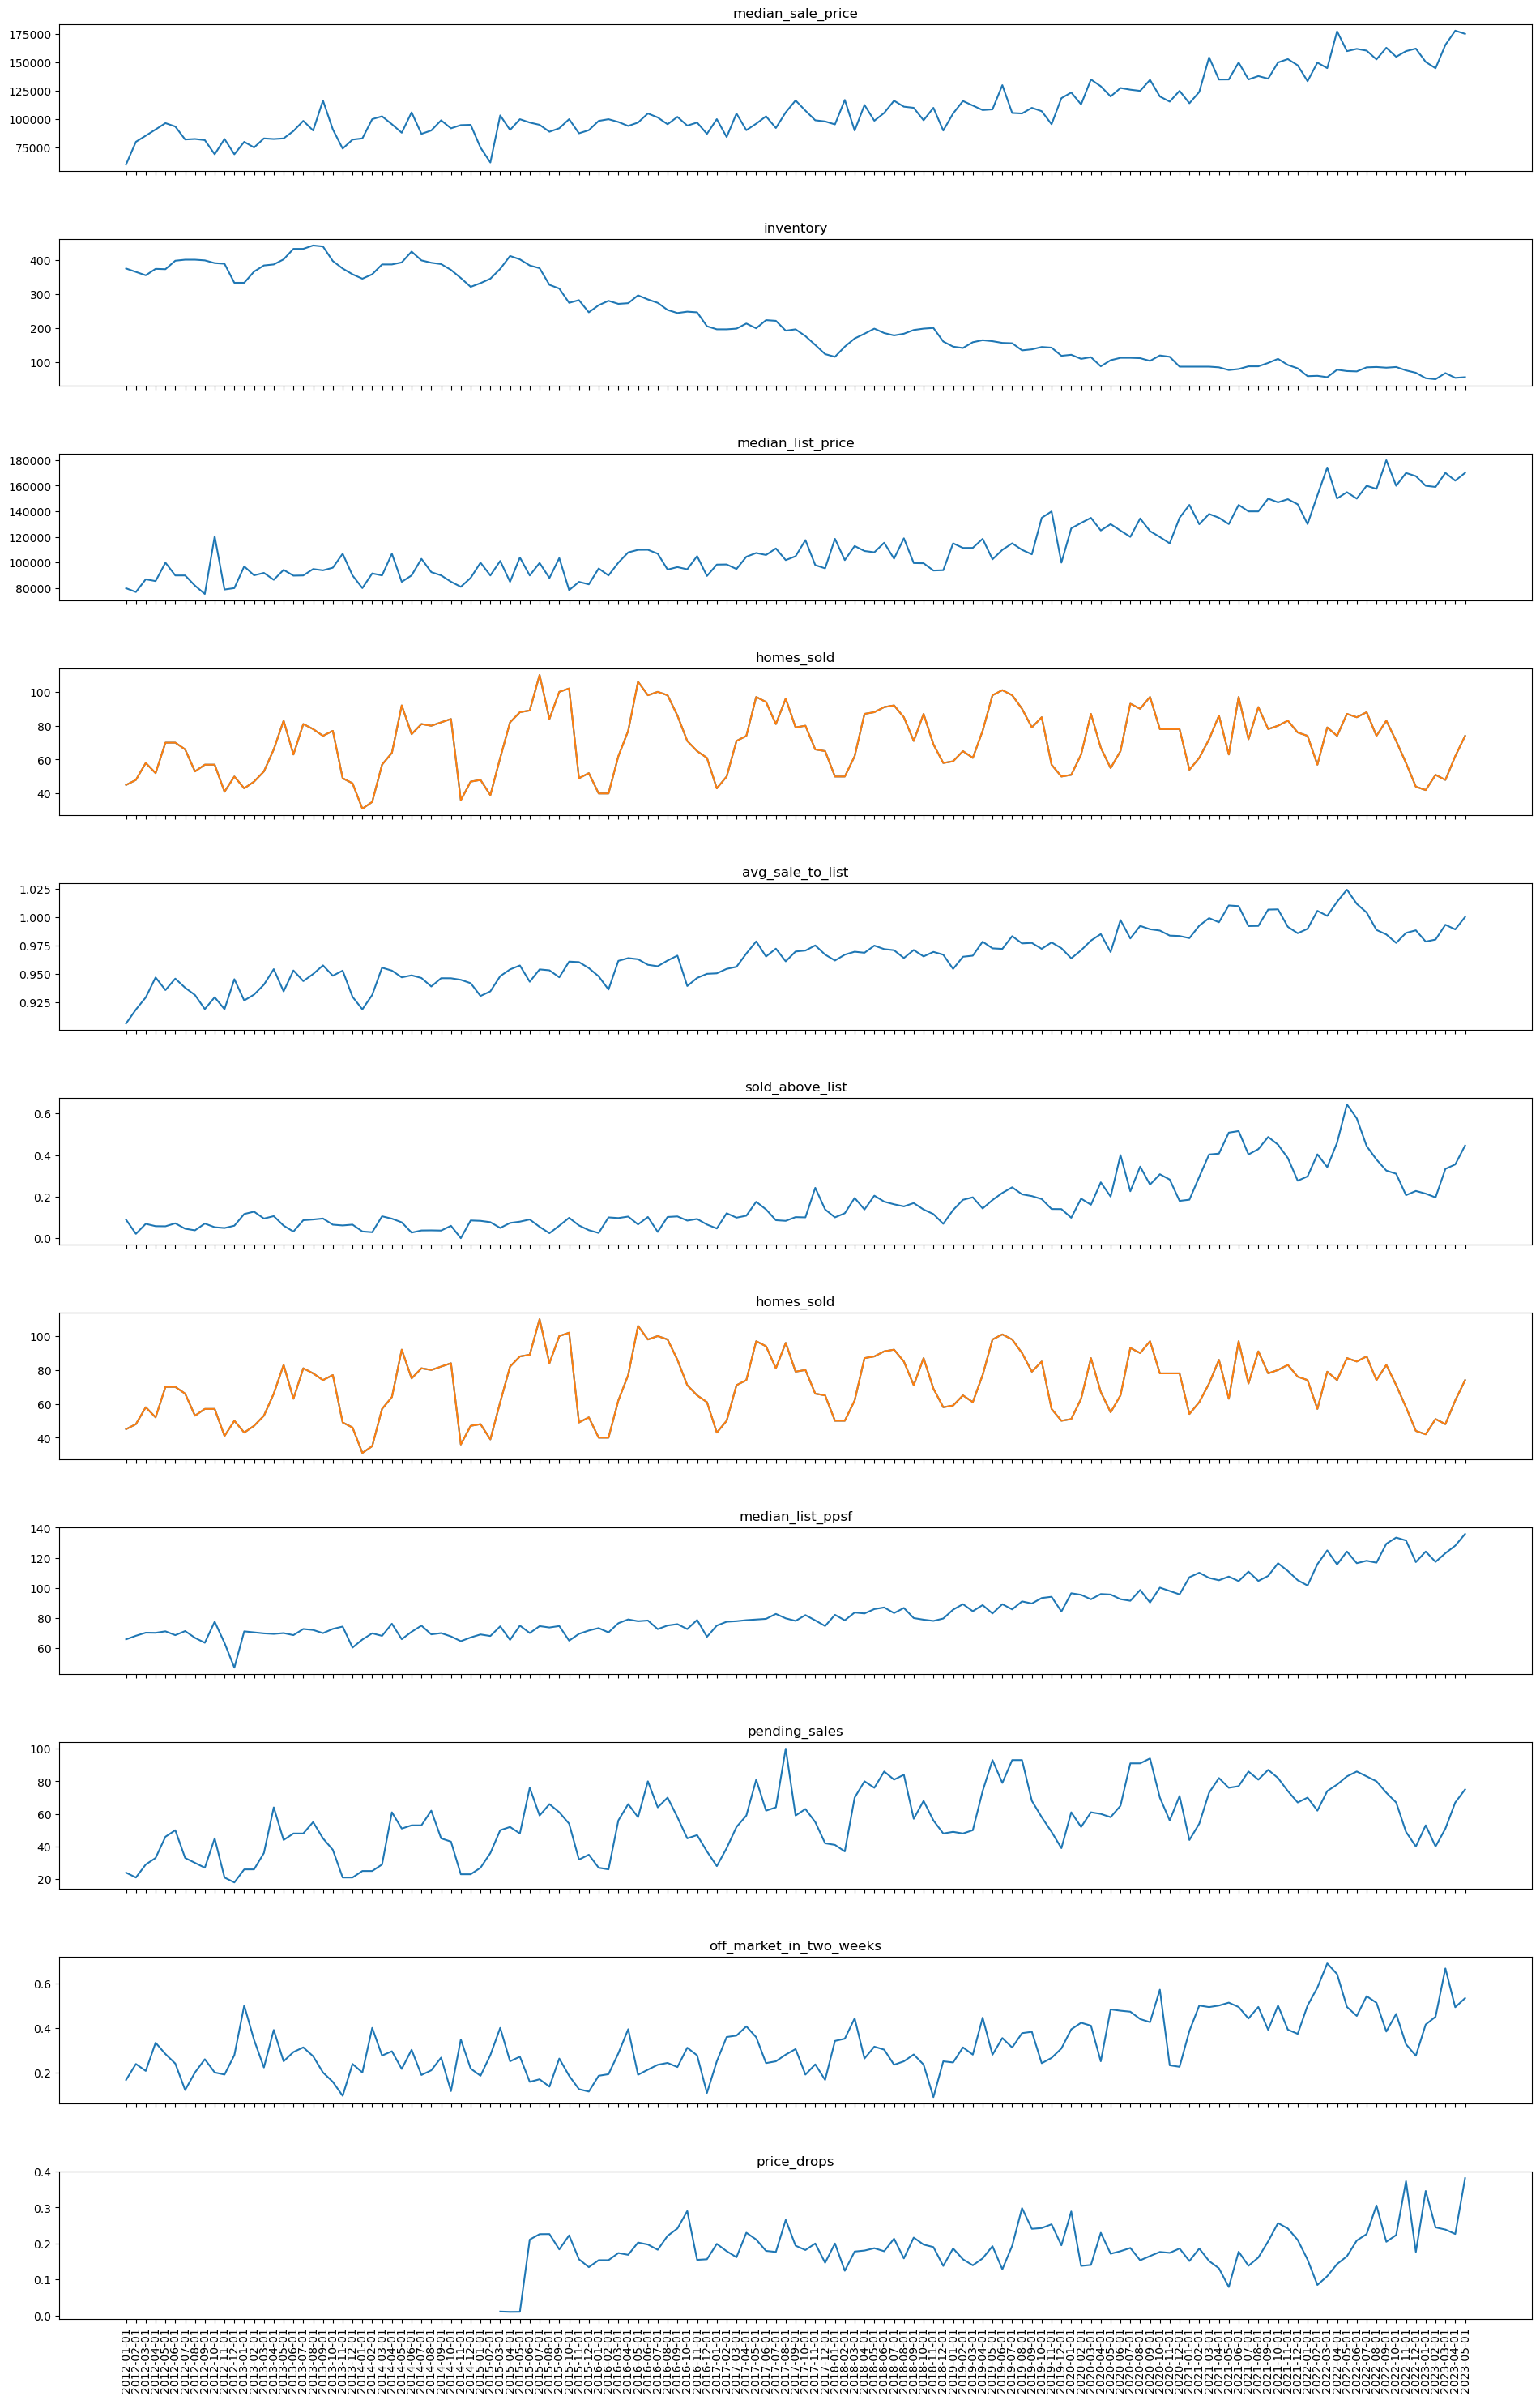

In [125]:
metrics = [ 'median_sale_price',
            'inventory',
            'median_list_price',
            'homes_sold',
            'avg_sale_to_list',
            'sold_above_list',
            'homes_sold',
            'median_list_ppsf',
            'pending_sales',
            'off_market_in_two_weeks',
            'price_drops',
            ]



fig, ax = plt.subplots(11,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics):
    ax[ind].plot(dayton_condo['period_begin'],dayton_condo[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_condo['period_begin'],rotation = 90)

### Muti-Family (2-4 Units)

C:\Users\wilke\AppData\Local\Temp\ipykernel_42968\2919694956.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_multi_family['period_begin'],rotation = 90)


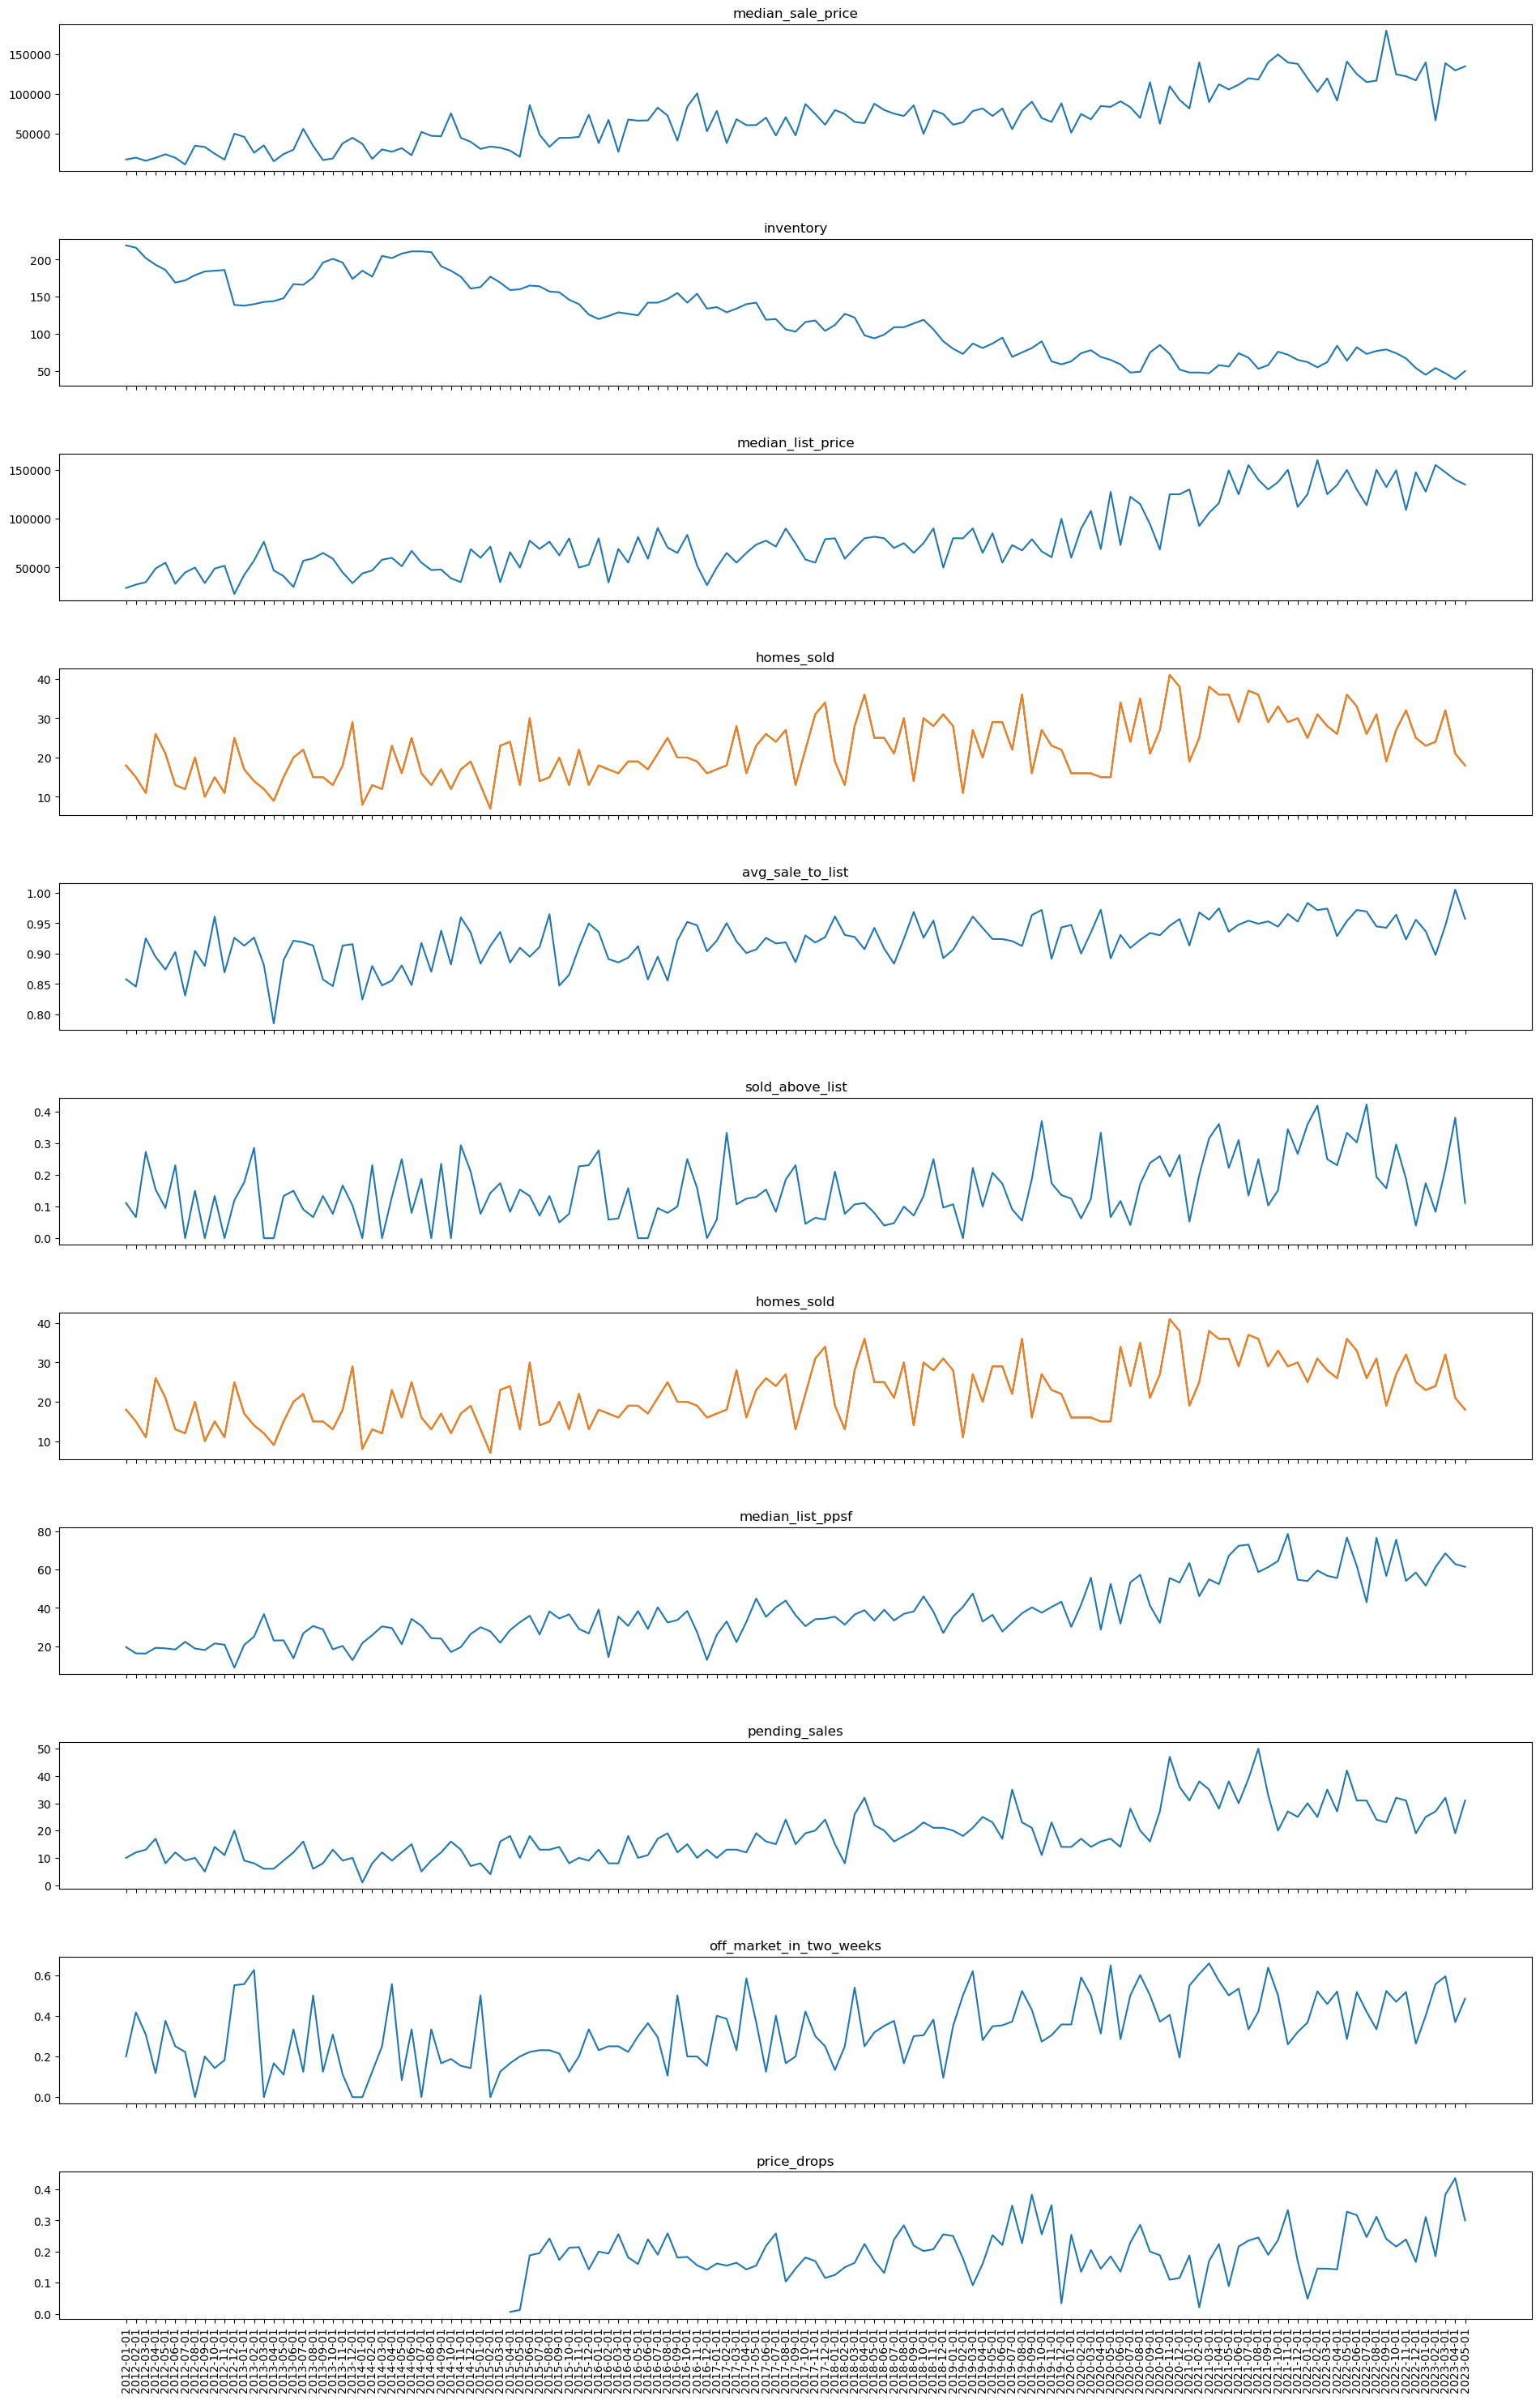

In [126]:
metrics = [ 'median_sale_price',
            'inventory',
            'median_list_price',
            'homes_sold',
            'avg_sale_to_list',
            'sold_above_list',
            'homes_sold',
            'median_list_ppsf',
            'pending_sales',
            'off_market_in_two_weeks',
            'price_drops',
            ]



fig, ax = plt.subplots(11,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics):
    ax[ind].plot(dayton_multi_family['period_begin'],dayton_multi_family[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_multi_family['period_begin'],rotation = 90)

### All Residential

C:\Users\wilke\AppData\Local\Temp\ipykernel_42968\3061486996.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)


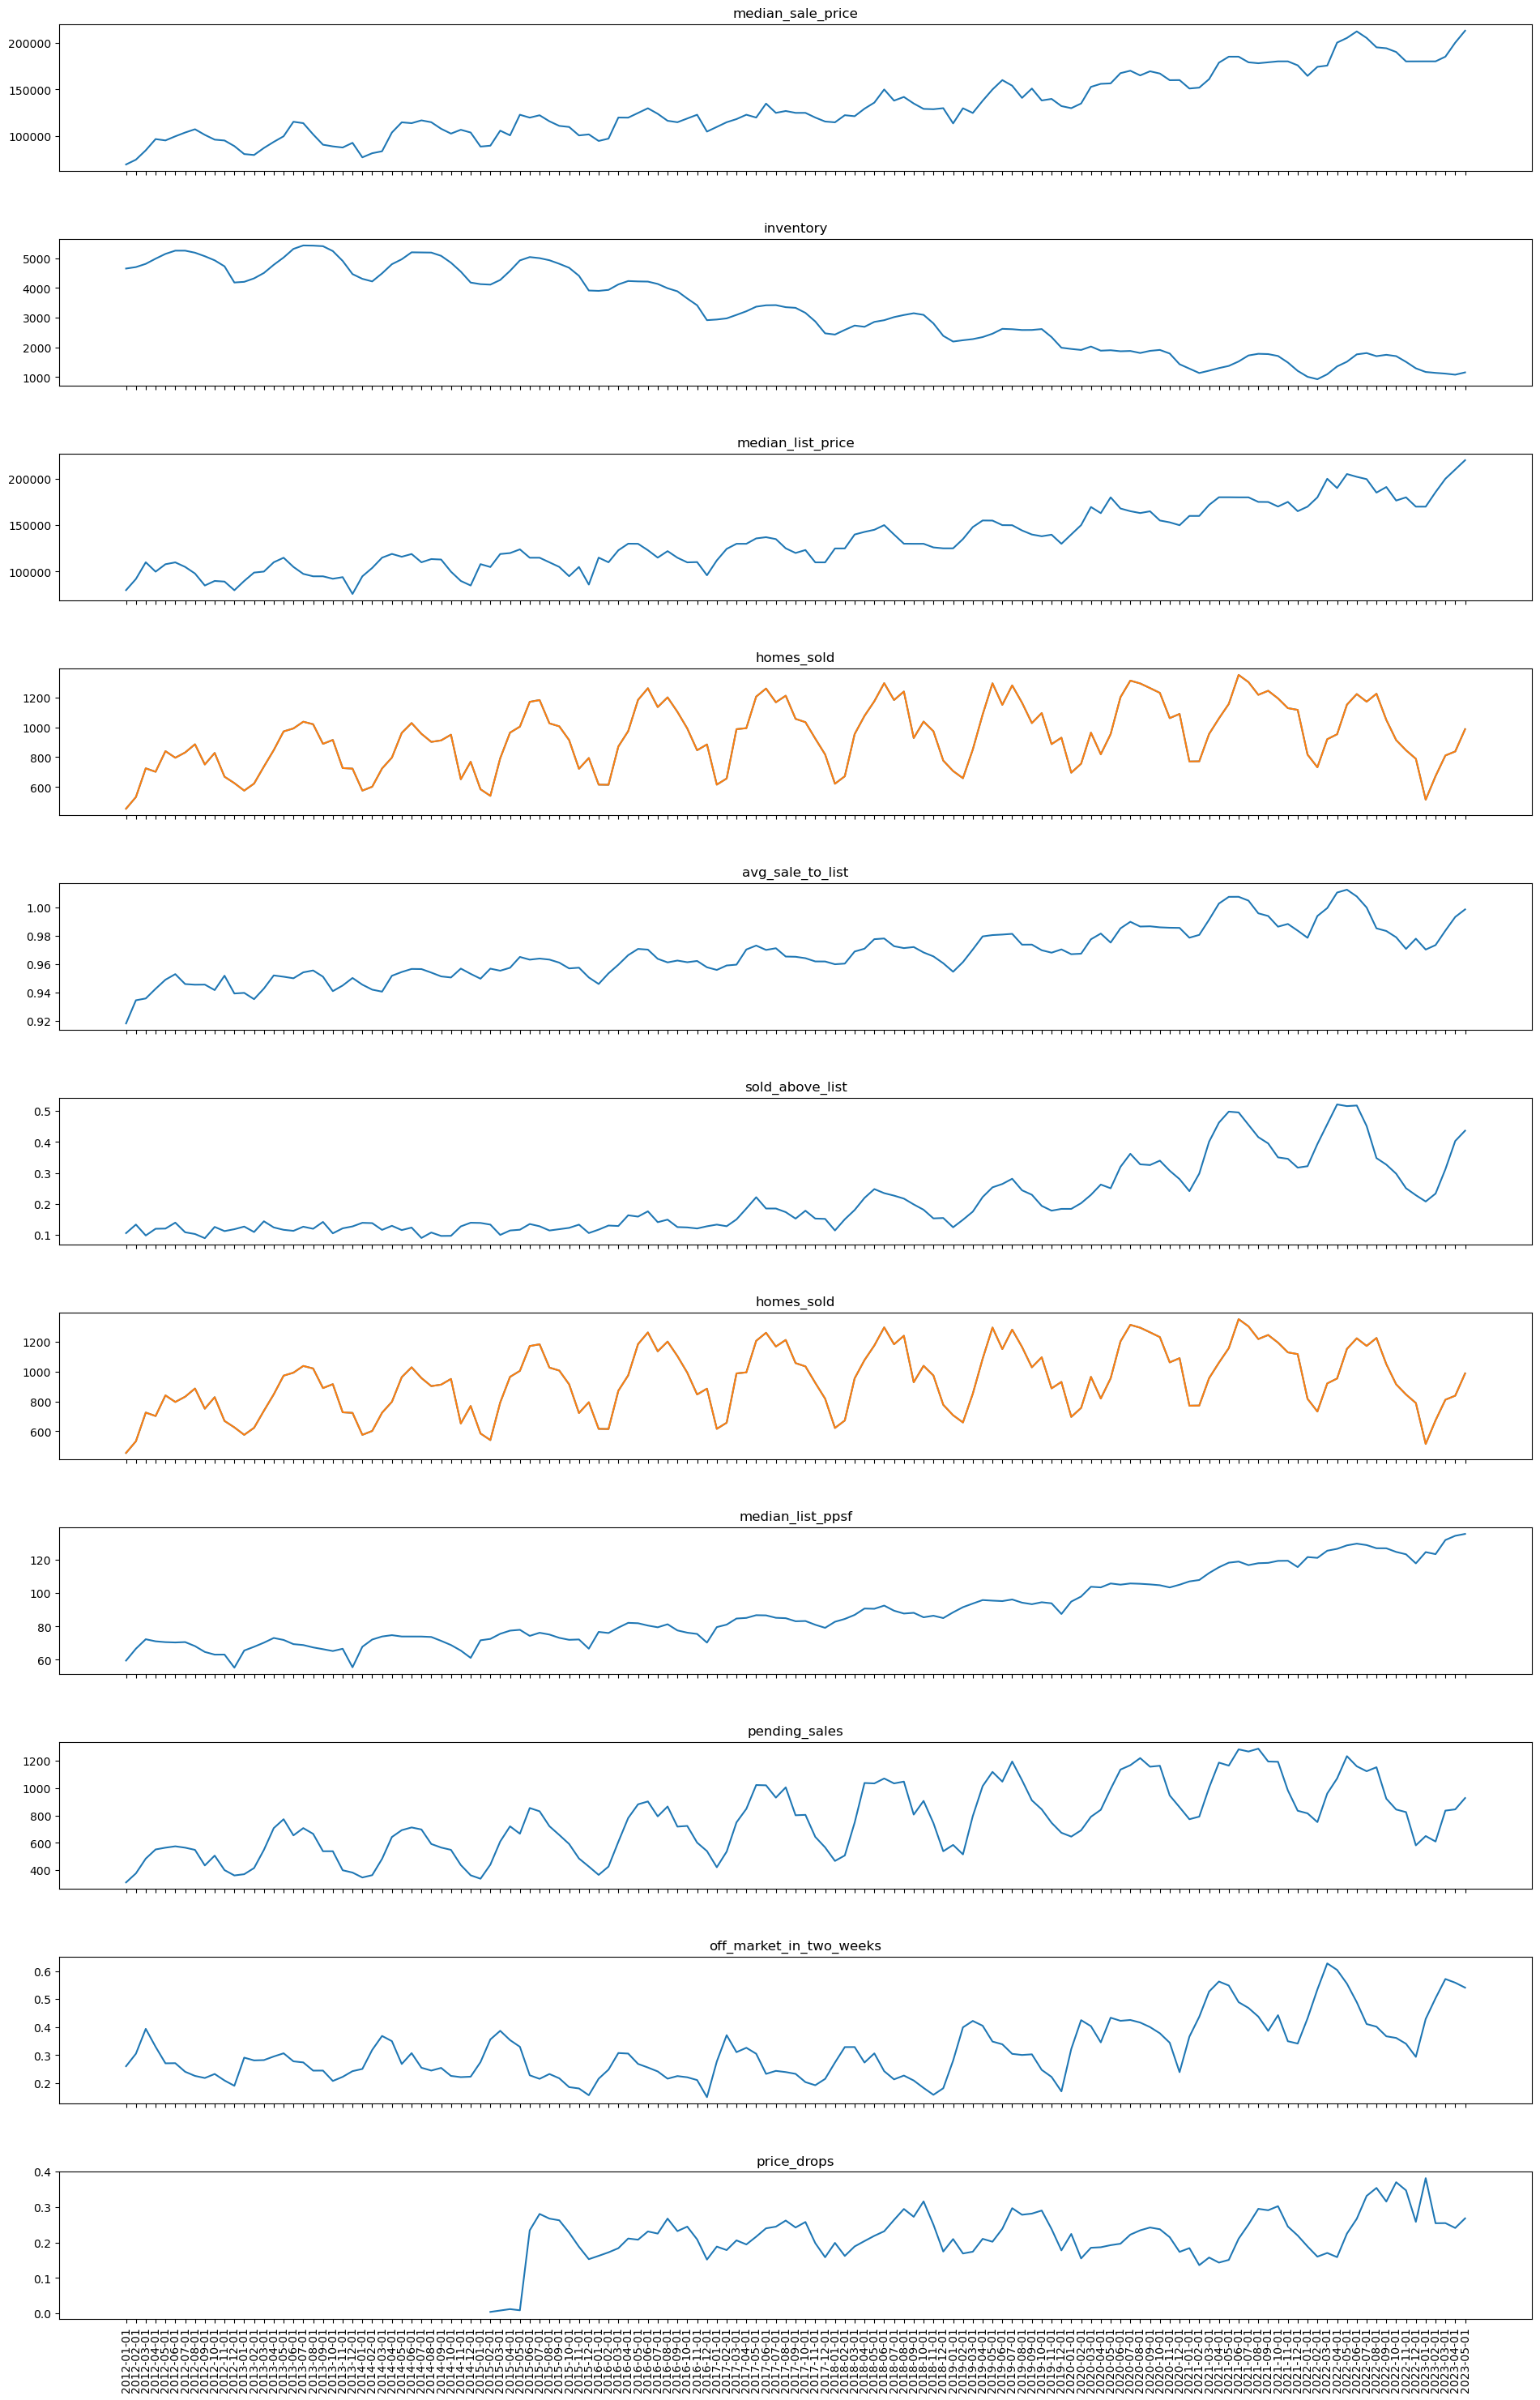

In [127]:
metrics = [ 'median_sale_price',
            'inventory',
            'median_list_price',
            'homes_sold',
            'avg_sale_to_list',
            'sold_above_list',
            'homes_sold',
            'median_list_ppsf',
            'pending_sales',
            'off_market_in_two_weeks',
            'price_drops',
            ]



fig, ax = plt.subplots(11,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics):
    ax[ind].plot(dayton_residential['period_begin'],dayton_residential[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)

### Takeaways from time-series graphs

- Dayton being a primarily residential/single-family area provides more consistent broad market trends.
- Condos, multifamily, and townhomes being less common, the market trends are less predictable from a broad market standpoint as they have a smaller sample.
- There has been a fairly large increase in homes being sold above list signifying a competitve buyers market.

### Month-Over-Month Metrics
Only going to look at residential and single-family as they follow more predictable trends

### Single-Family Home
*Month_over_month*

C:\Users\wilke\AppData\Local\Temp\ipykernel_47604\759831397.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)


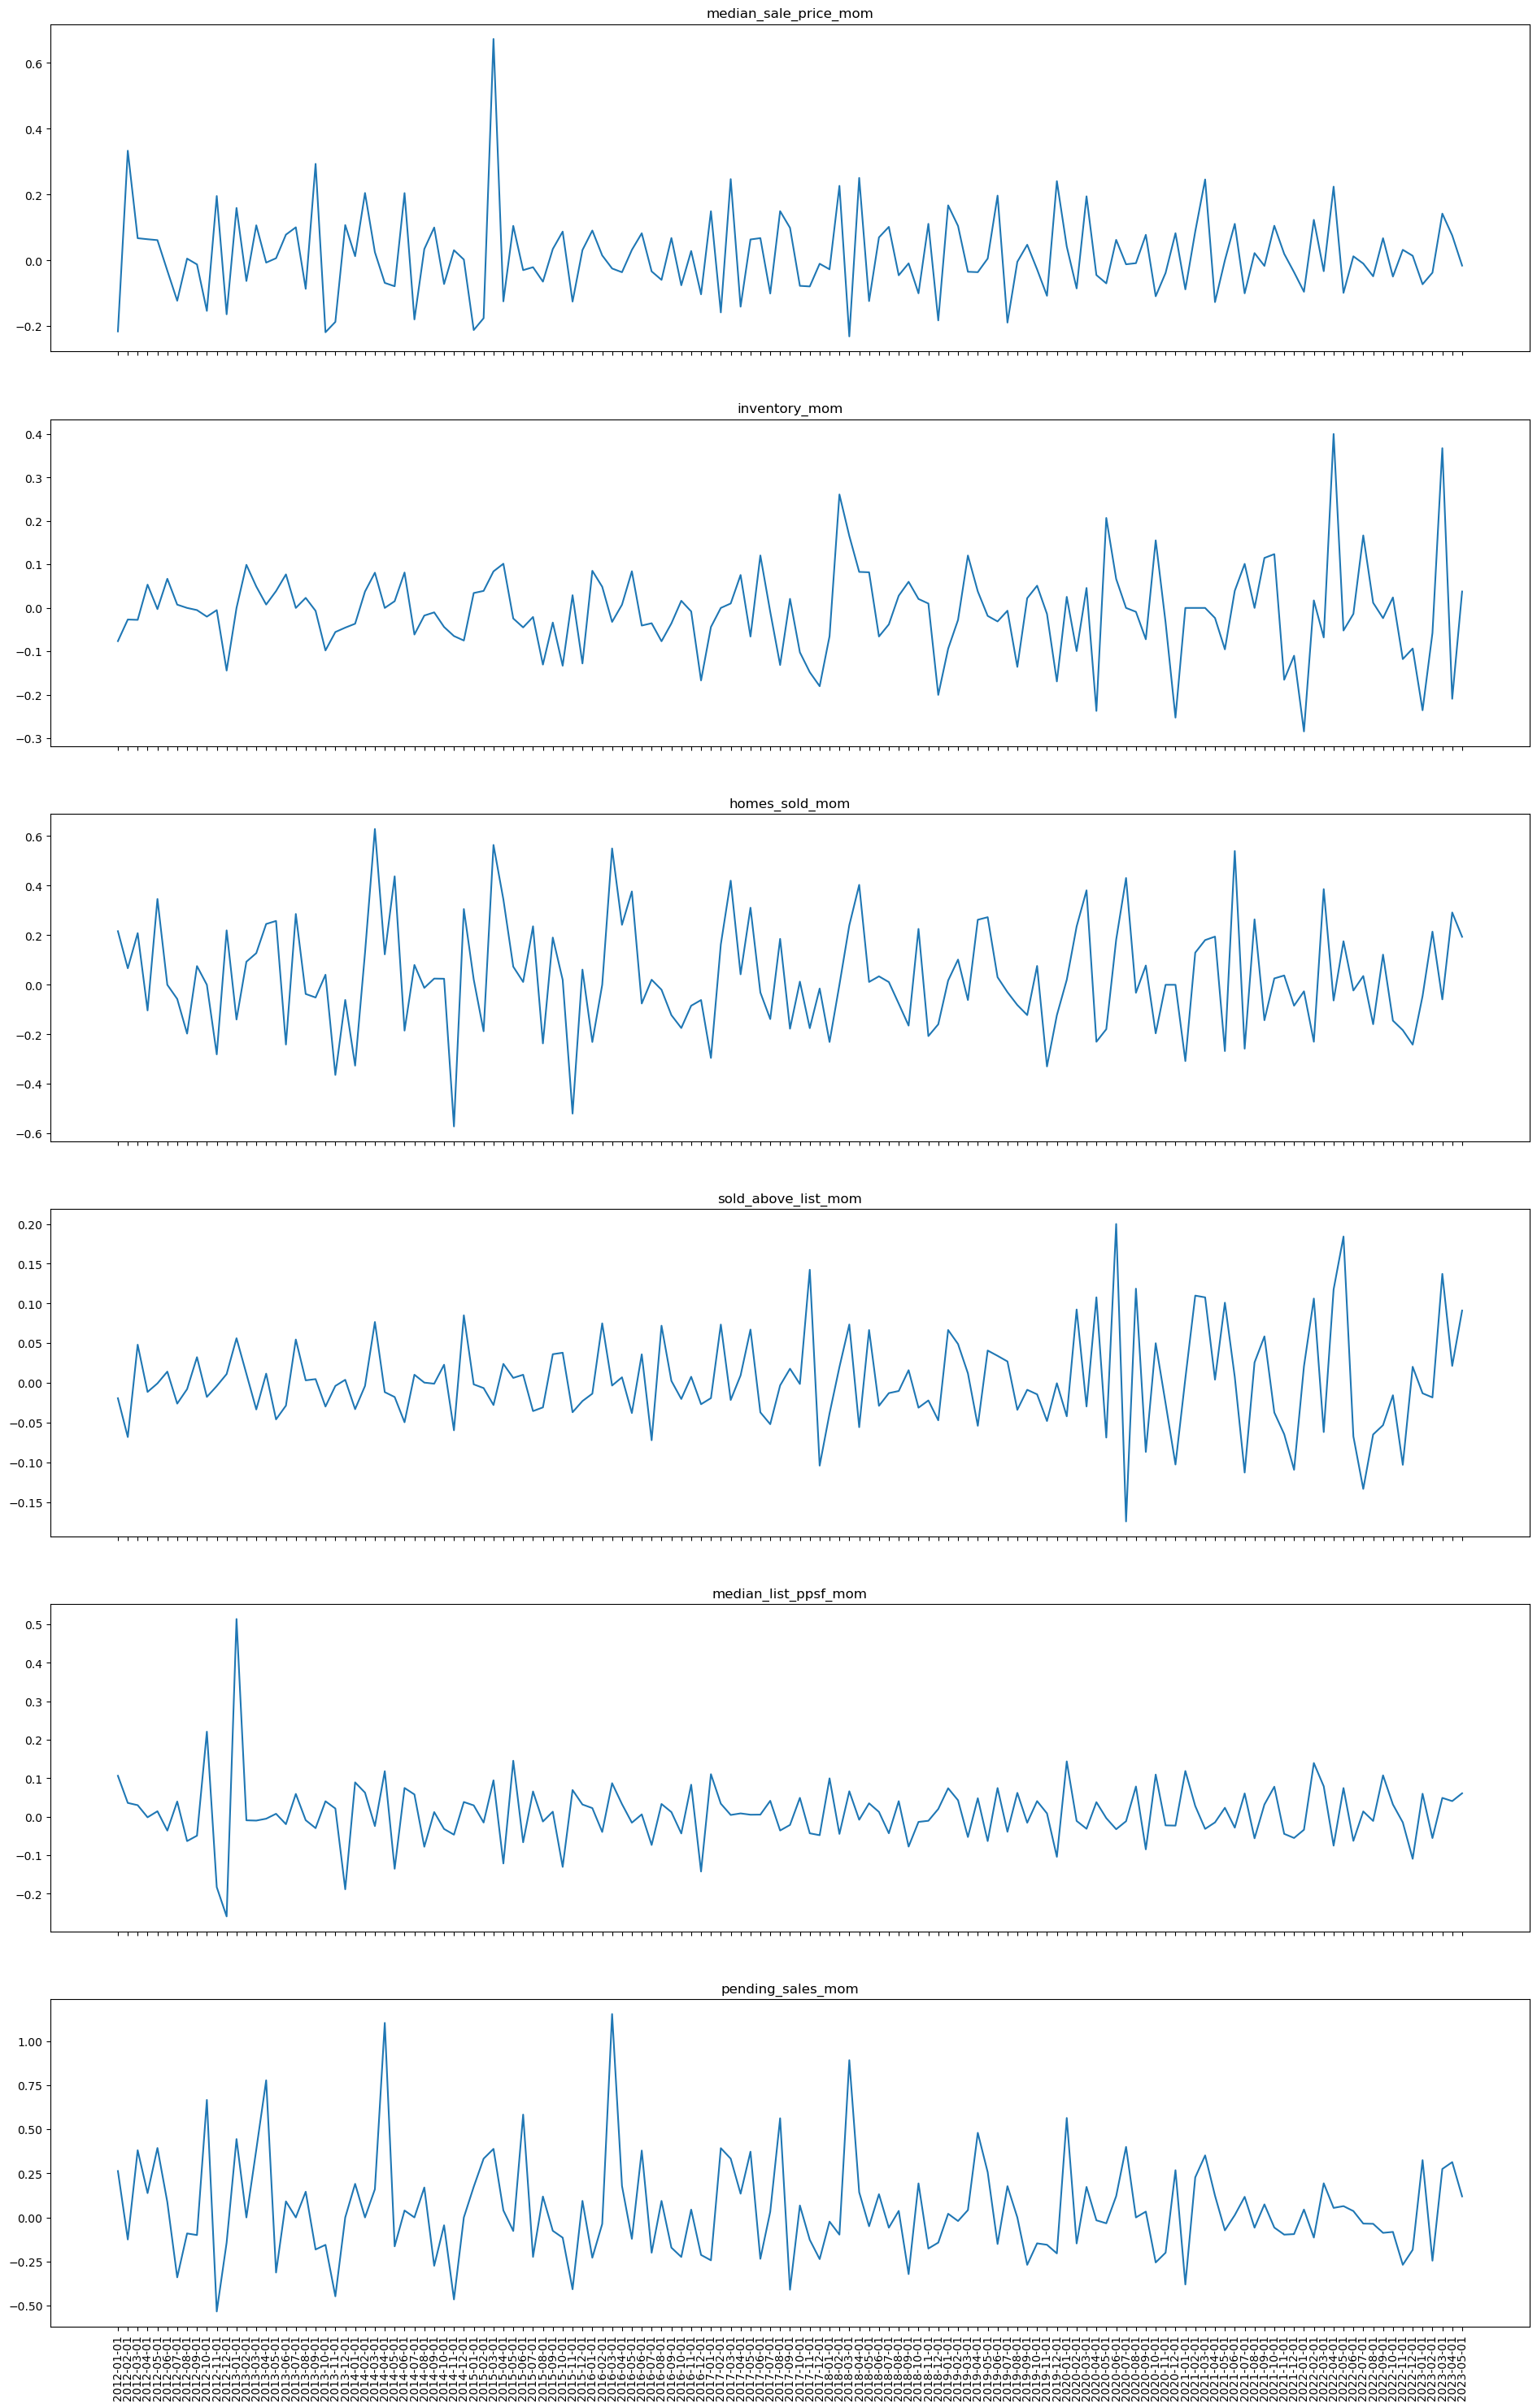

In [34]:
metrics_mom = [ 'median_sale_price_mom',
            'inventory_mom',
            'homes_sold_mom',
            'sold_above_list_mom',
            'median_list_ppsf_mom',
            'pending_sales_mom'
            ]



fig, ax = plt.subplots(6,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics_mom):
    ax[ind].plot(dayton_family_home['period_begin'],dayton_condo[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)

### All Residential
_Month-Over-Month_

C:\Users\wilke\AppData\Local\Temp\ipykernel_47604\1691309848.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)


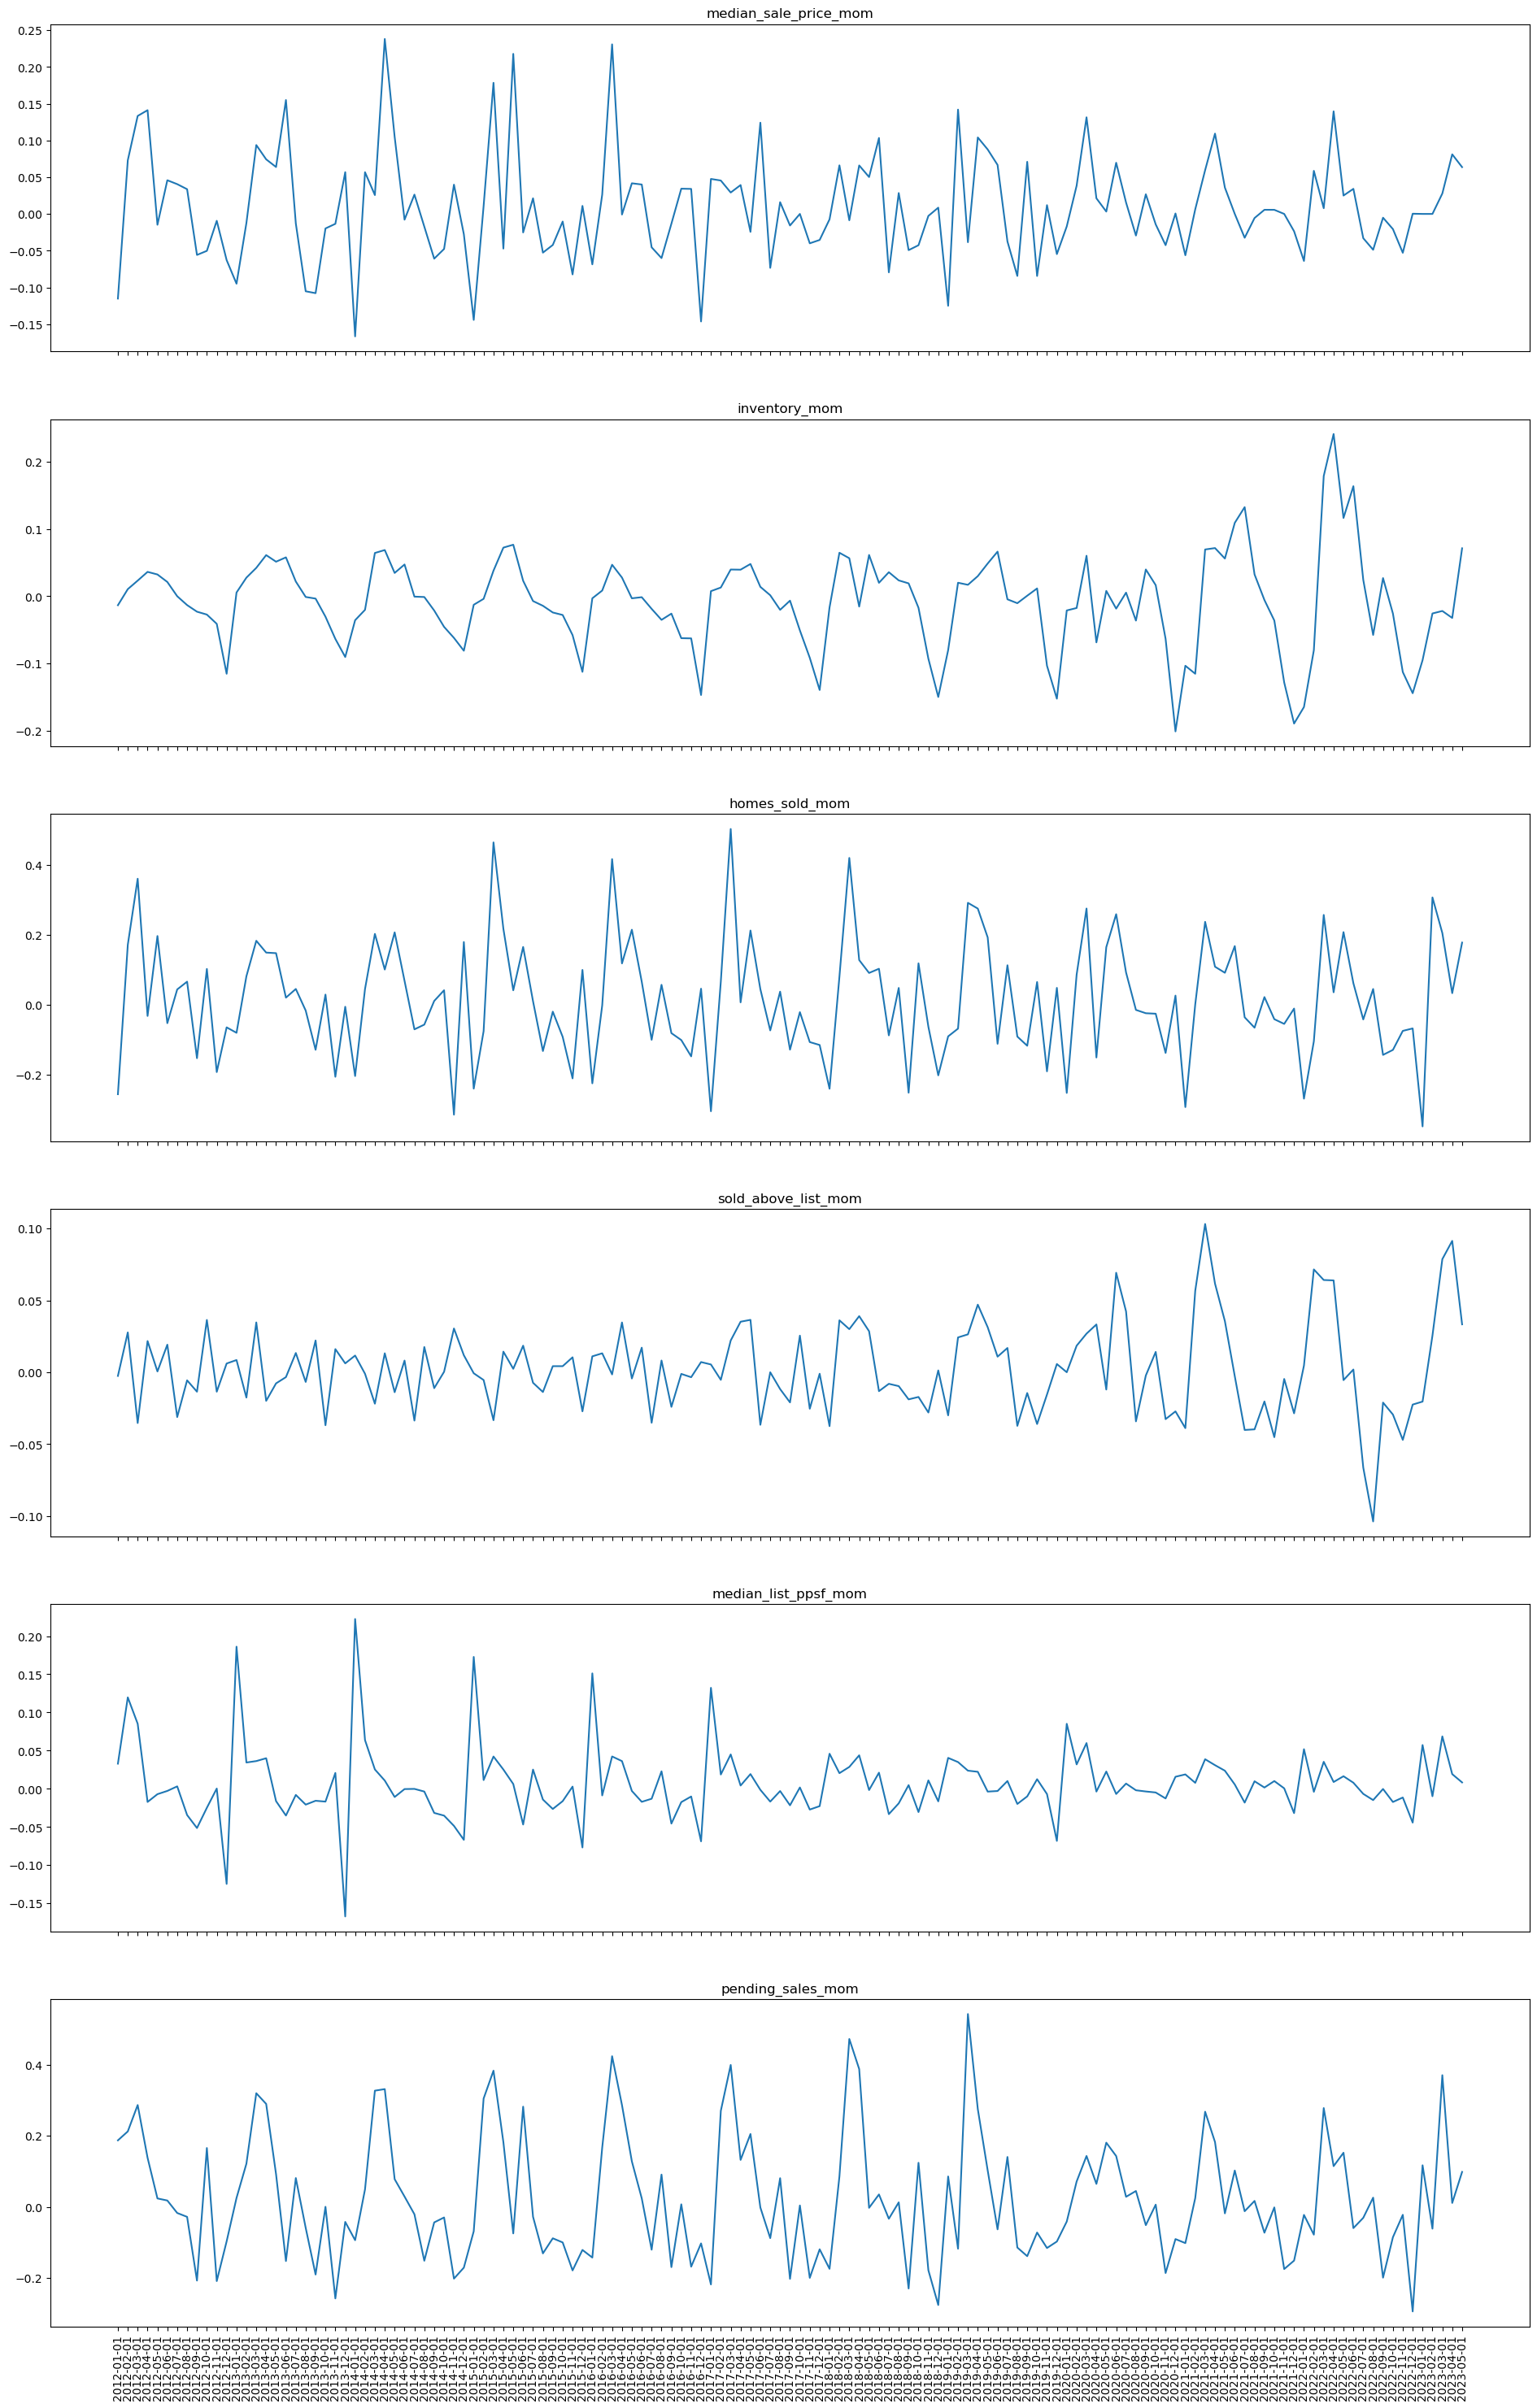

In [35]:
metrics_mom = [ 'median_sale_price_mom',
            'inventory_mom',
            'homes_sold_mom',
            'sold_above_list_mom',
            'median_list_ppsf_mom',
            'pending_sales_mom'
            ]



fig, ax = plt.subplots(6,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics_mom):
    ax[ind].plot(dayton_residential['period_begin'],dayton_residential[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)

### Month-Over-Month Observations

- Since the real estate market is seasonal, month over month doesn't provide as much insight as present metrics and year-over-year metrics.


## Year-Over-Year Metrics

#### Single-Family Home

C:\Users\wilke\AppData\Local\Temp\ipykernel_47604\2833583520.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)


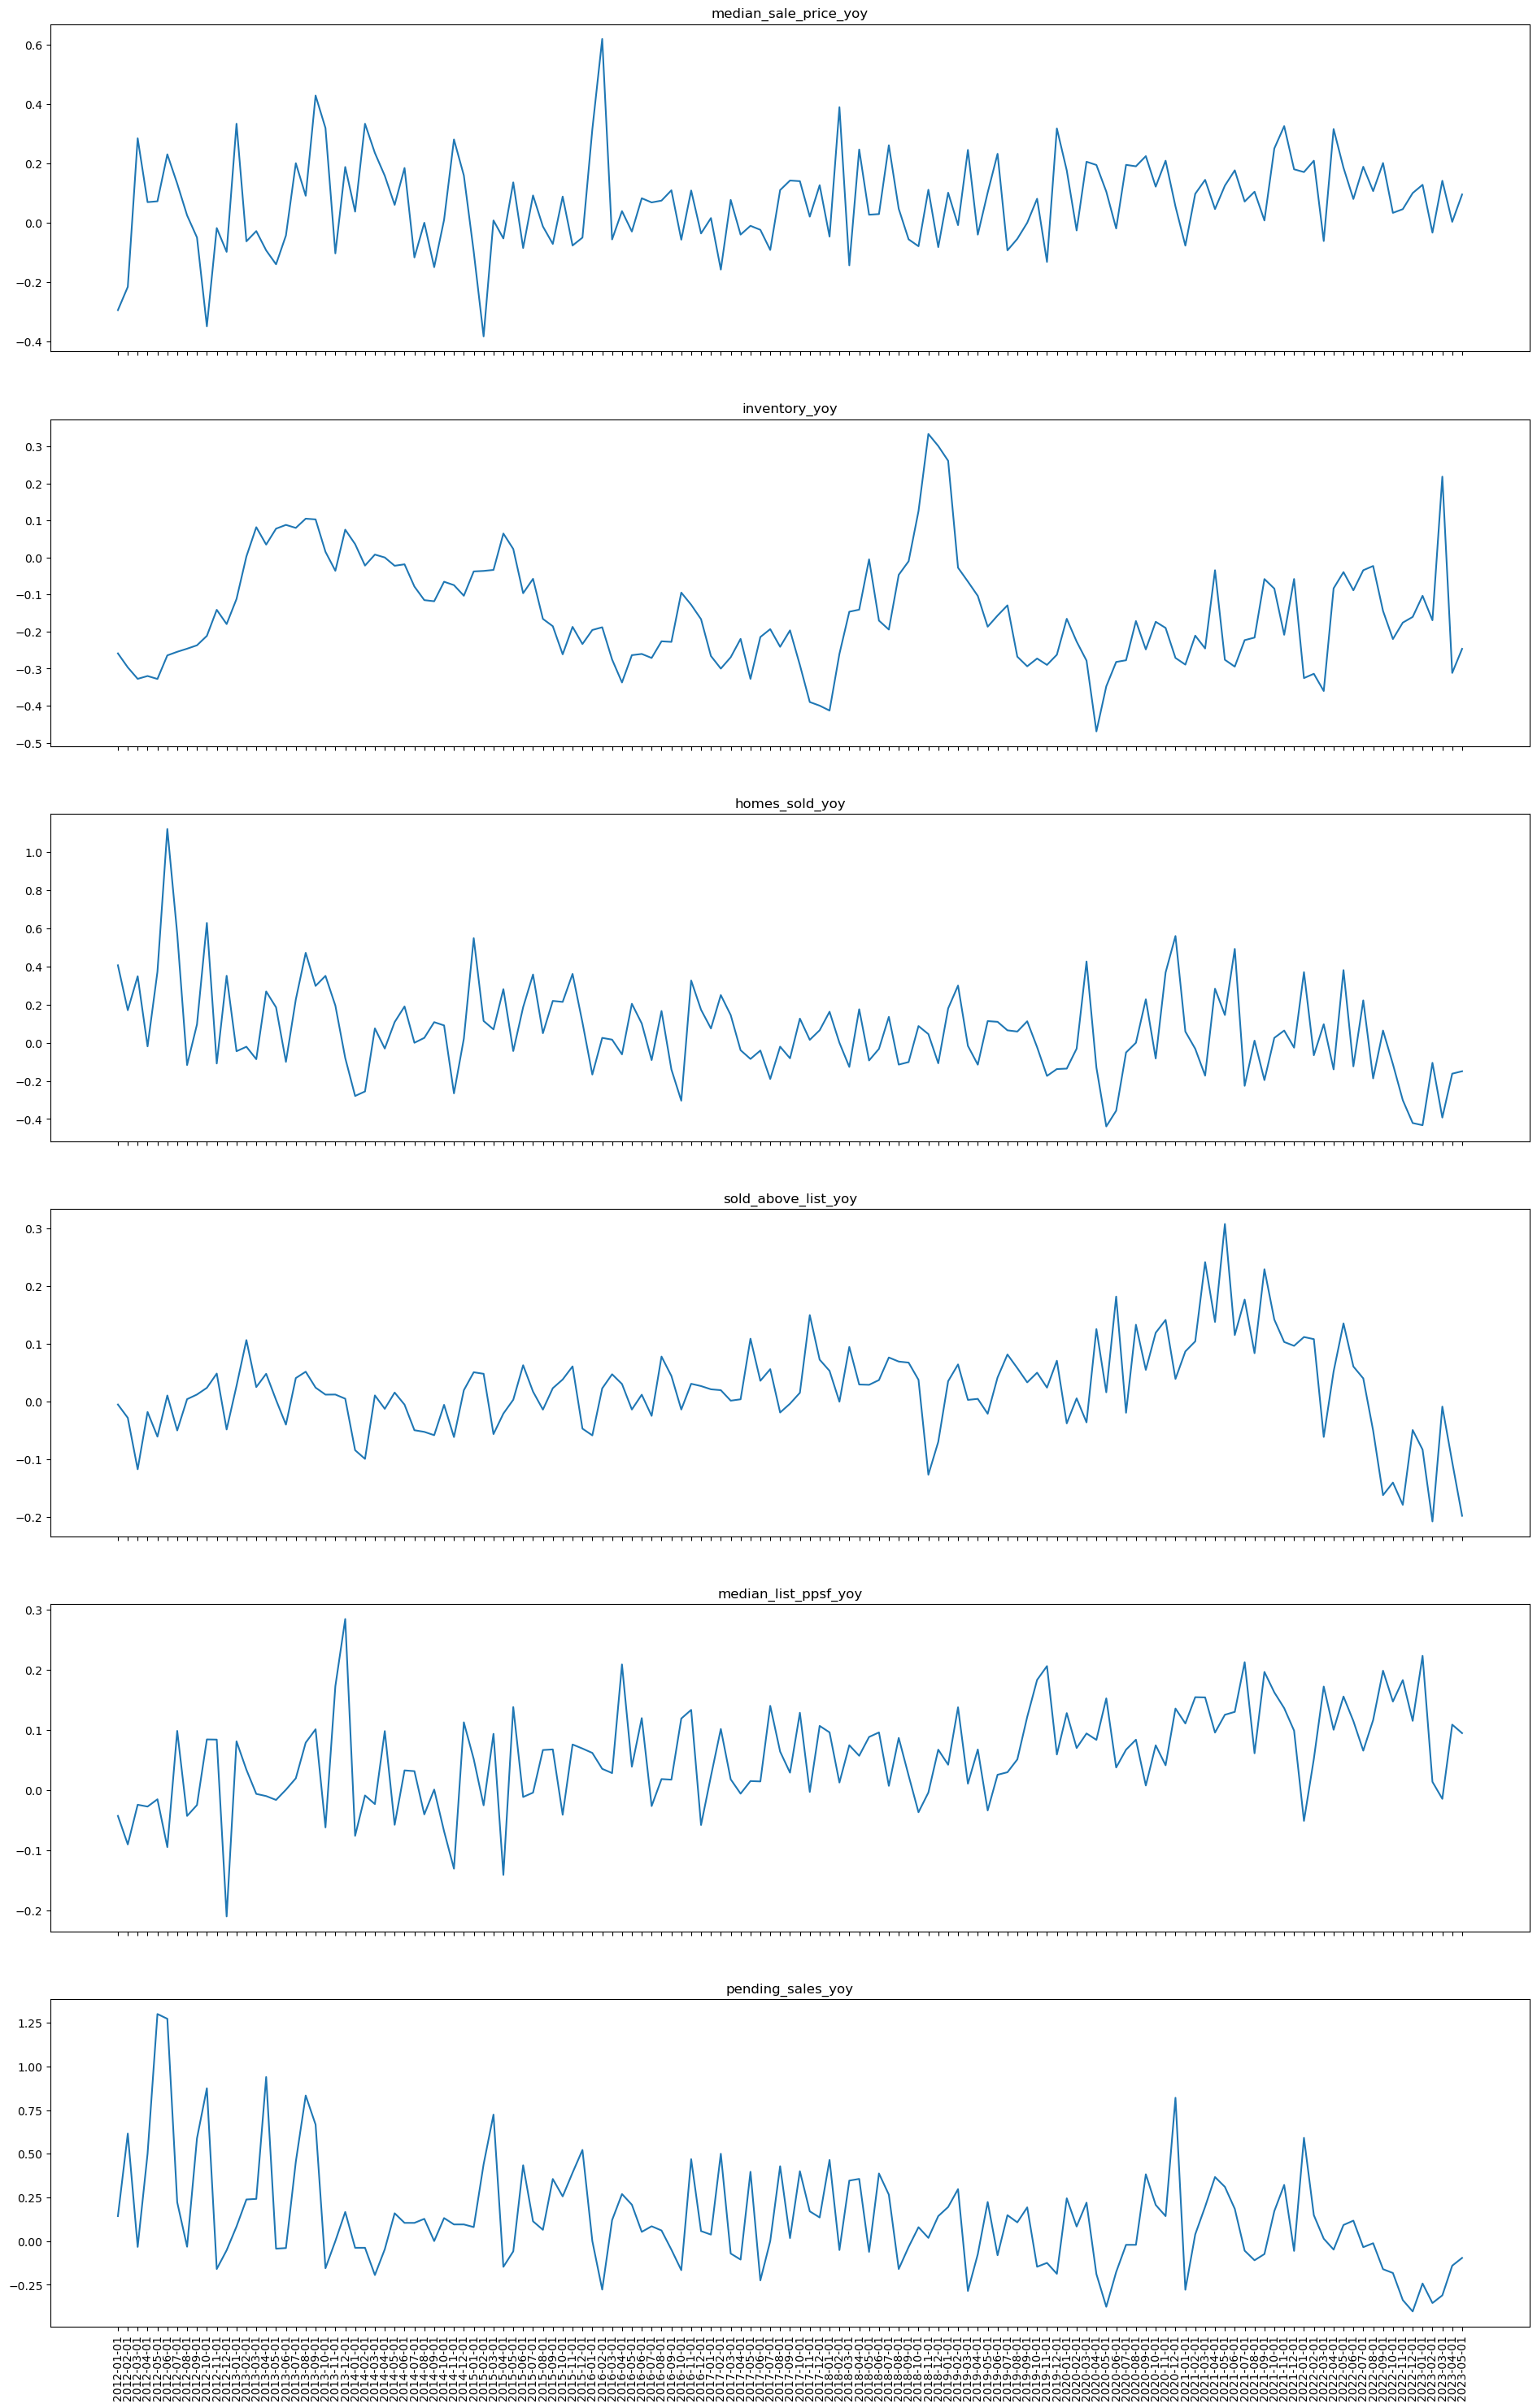

In [36]:
metrics_mom = [ 'median_sale_price_yoy',
            'inventory_yoy',
            'homes_sold_yoy',
            'sold_above_list_yoy',
            'median_list_ppsf_yoy',
            'pending_sales_yoy'
            ]



fig, ax = plt.subplots(6,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics_mom):
    ax[ind].plot(dayton_family_home['period_begin'],dayton_condo[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_family_home['period_begin'],rotation = 90)

### All Residential

_Year-Over-Year_

C:\Users\wilke\AppData\Local\Temp\ipykernel_47604\1910253905.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)


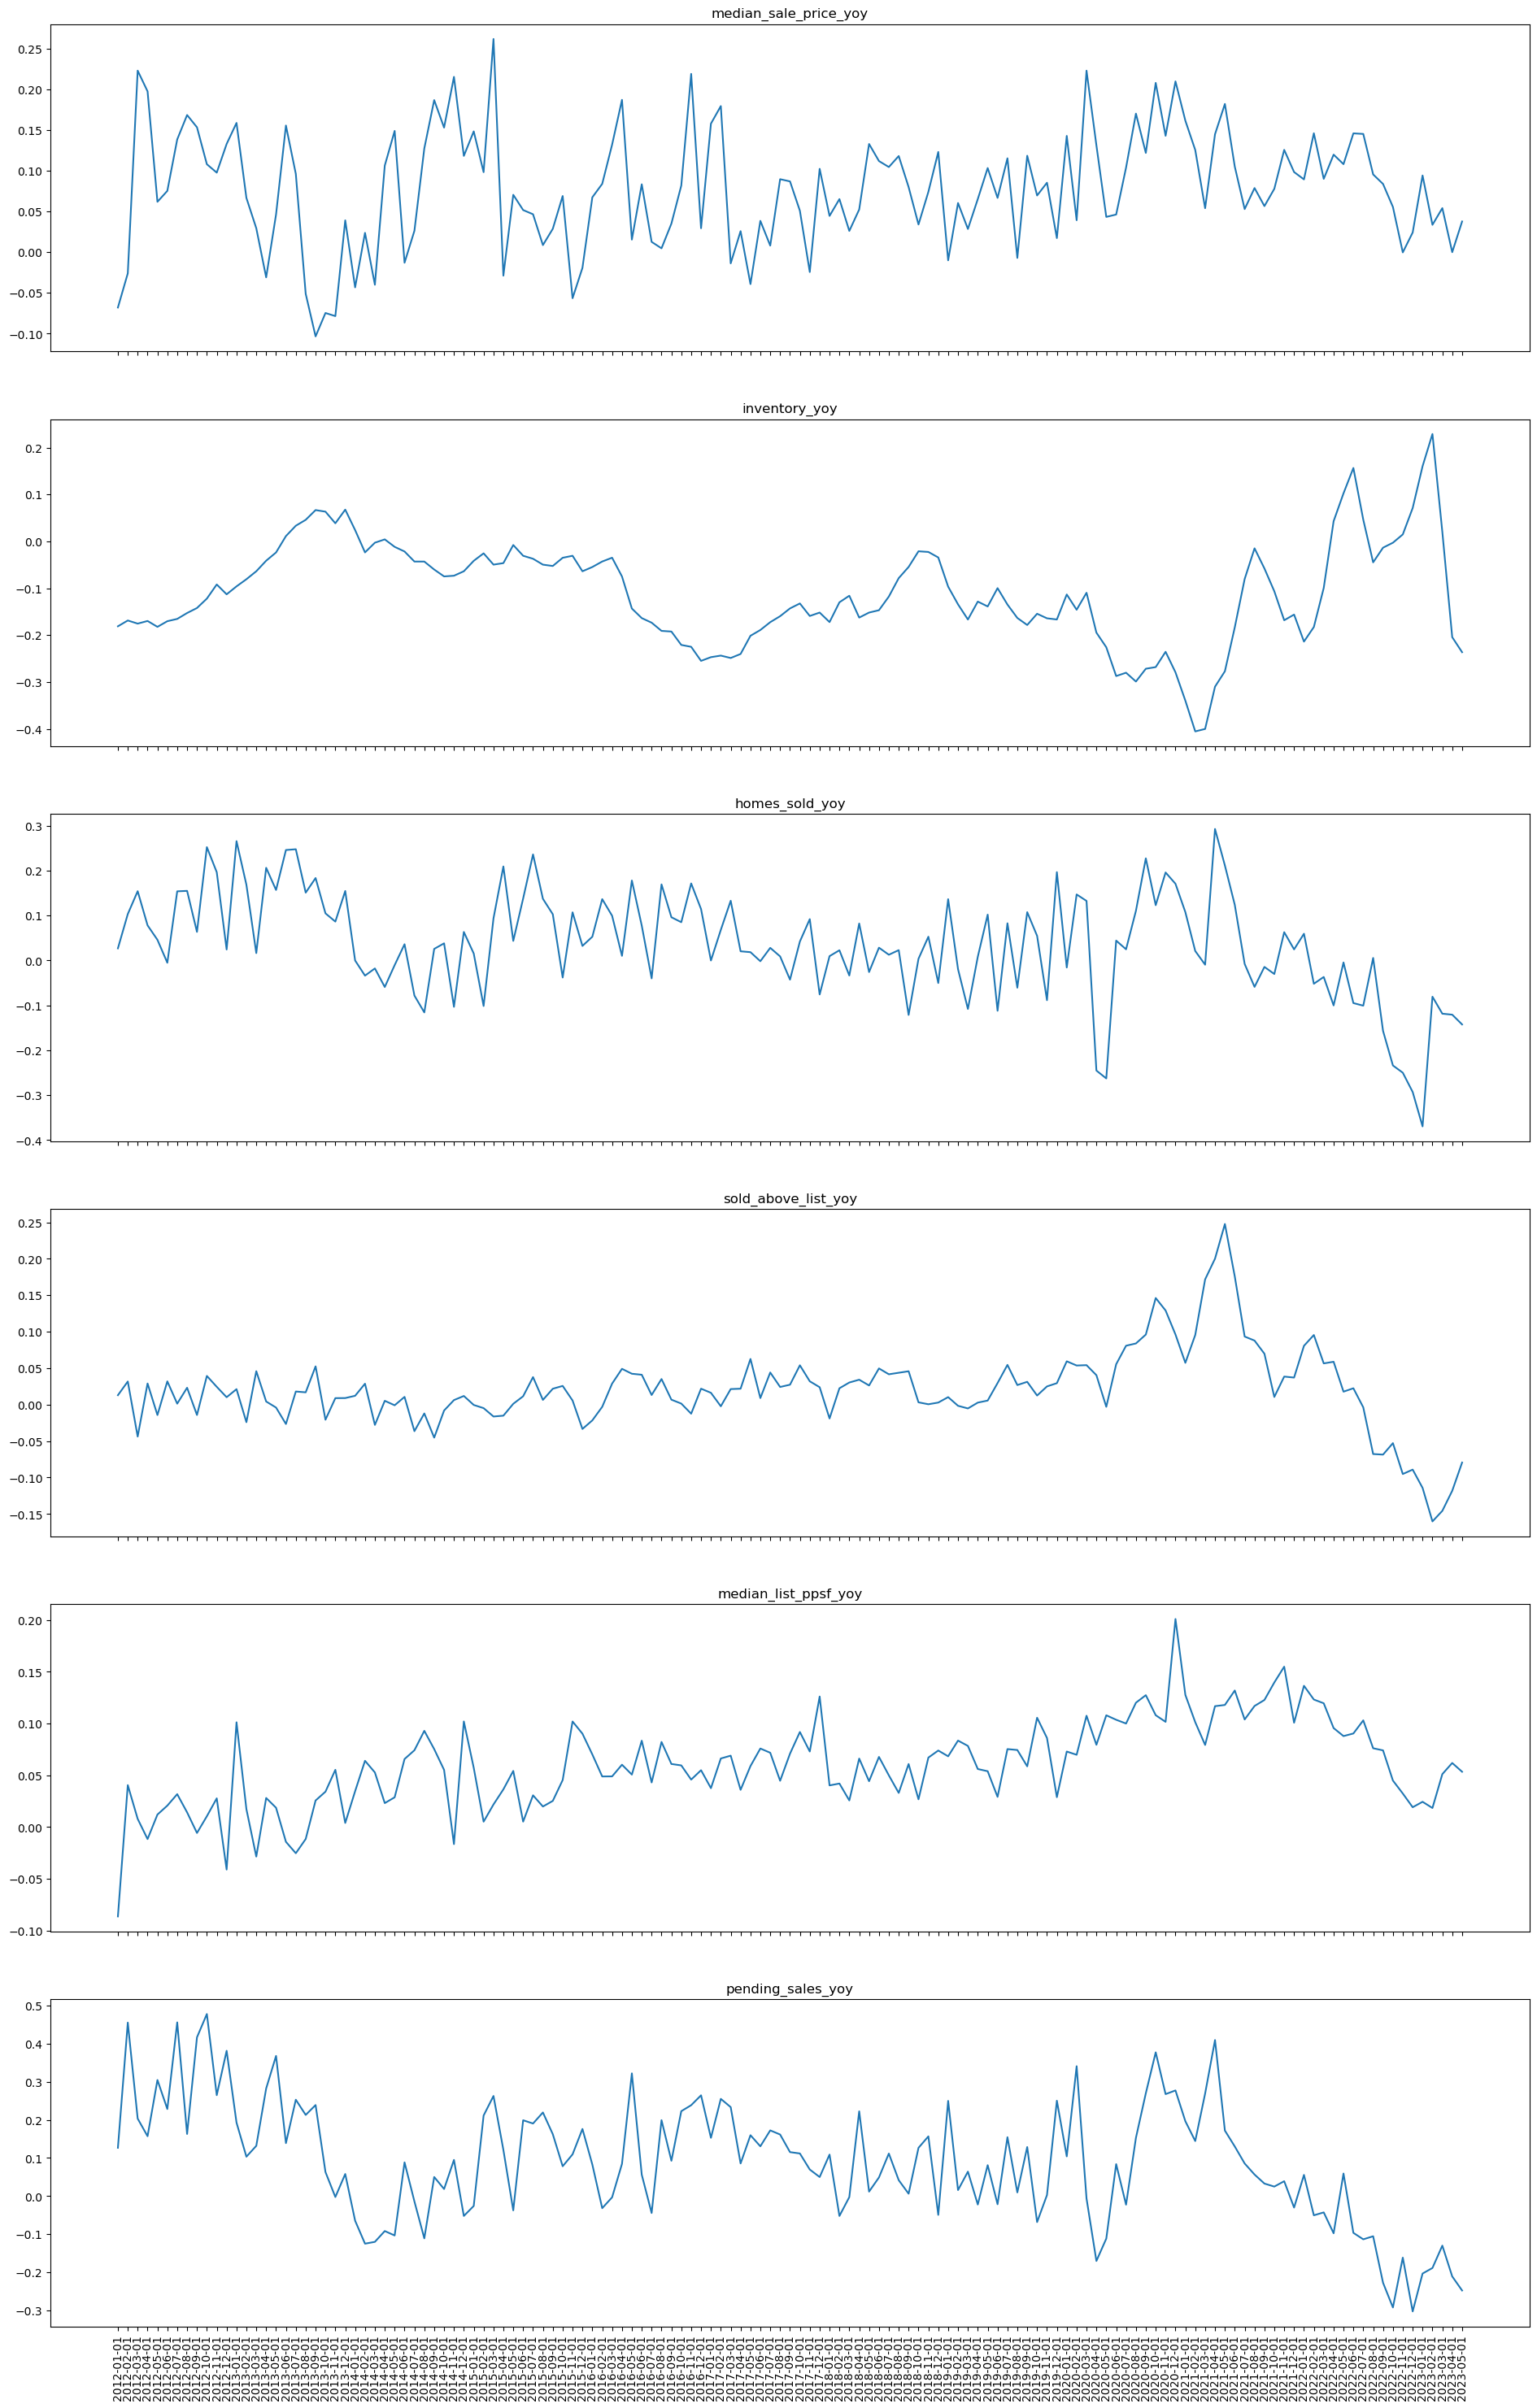

In [37]:
metrics_mom = [ 'median_sale_price_yoy',
            'inventory_yoy',
            'homes_sold_yoy',
            'sold_above_list_yoy',
            'median_list_ppsf_yoy',
            'pending_sales_yoy'
            ]



fig, ax = plt.subplots(6,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics_mom):
    ax[ind].plot(dayton_residential['period_begin'],dayton_residential[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_residential['period_begin'],rotation = 90)

### Year-Over-Year Observations

- Sold_above_list and home_sold have seen year over year declines. Inventory has recent spikes inventory year-over-year growth.
    - indicating decreasing market competition

# Implement Historical Mortgage Rate Data

Import dataset from FreddieMac

In [39]:
mortgage_df = pd.read_csv('mortgageData.csv',encoding= 'unicode_escape')

In [40]:
#convert to datetime

mortgage_df['Week'] = pd.to_datetime(mortgage_df['Week'])

In [41]:
#get only records that match with redfindata

mortgage_df = mortgage_df[mortgage_df['Week'] >= '2012-01-01']

In [42]:
#create columns to get dates groupable by month

warnings.filterwarnings("ignore")

mortgage_df['year'] = mortgage_df['Week'].dt.year
mortgage_df['month'] = mortgage_df['Week'].dt.month
mortgage_df['day'] = [1 for i in range(len(mortgage_df))]

In [43]:
mortgage_df

Week  30YrFRM 30YrFees  15YrFRM  15YrFees  51ARM  51ARMFees  year  \
2127 2012-01-05     3.91      0.8     3.23       0.8   2.86        0.7  2012   
2128 2012-01-12     3.89      0.7     3.16       0.8   2.82        0.7  2012   
2129 2012-01-19     3.88      0.8     3.17       0.8   2.82        0.7  2012   
2130 2012-01-26     3.98      0.7     3.24       0.8   2.85        0.7  2012   
2131 2012-02-02     3.87      0.8     3.14       0.8   2.80        0.7  2012   
...         ...      ...      ...      ...       ...    ...        ...   ...   
2721 2023-05-25     6.57      NaN     5.97       NaN    NaN        NaN  2023   
2722 2023-06-01     6.79      NaN     6.18       NaN    NaN        NaN  2023   
2723 2023-06-08     6.71      NaN     6.07       NaN    NaN        NaN  2023   
2724 2023-06-15     6.69      NaN     6.10       NaN    NaN        NaN  2023   
2725 2023-06-22     6.67      NaN     6.03       NaN    NaN        NaN  2023   

      month  day  
2127      1    1  
2128      1    1  
2129      1    1  
2130      1    1  
2131      2    1  
...     ...  ...  
2721      5    1  
2722      6    1  
2723      6    1  
2724      6    1  
2725      6    1  

[599 rows x 10 columns]

In [44]:
#Create a new date column with days of the month all the same
mortgage_df['Date'] = pd.to_datetime({'year':mortgage_df['year'],
                                      'month':mortgage_df['month'],
                                      'day':mortgage_df['day']})

In [45]:
#drop original date columns
mortgage_clean_dates = mortgage_df.drop(['Week','year','month','day'],axis = 1)

In [46]:
#group by month in order to be able to join on redfin data

thirtyFRM = pd.DataFrame(mortgage_clean_dates.groupby('Date').agg(np.mean)['30YrFRM']).reset_index()
thirtyFRM = thirtyFRM[:-1]

dayton_residential.reset_index(inplace = True)

Join Redfin market data and Freddie Max mortgage data

In [47]:
dayton_residential_FRM = dayton_residential.merge(right = thirtyFRM['30YrFRM'], how = 'inner',right_index=True,left_index=True)
dayton_residential_FRM.columns

Index(['index', 'period_begin', 'parent_metro_region', 'property_type',
       'median_list_price', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'homes_sold', 'homes_sold_mom',
       'homes_sold_yoy', 'median_list_ppsf', 'median_list_ppsf_mom',
       'median_list_ppsf_yoy', 'inventory', 'inventory_mom', 'inventory_yoy',
       'avg_sale_to_list', 'sold_above_list', 'sold_above_list_mom',
       'sold_above_list_yoy', 'off_market_in_two_weeks', 'price_drops',
       'pending_sales', 'pending_sales_mom', 'pending_sales_yoy', '30YrFRM'],
      dtype='object')

In [55]:
dayton_residential_FRM

index period_begin    property_type parent_metro_region  \
0    155893   2012-01-01  All Residential          Dayton, OH   
1    132602   2012-02-01  All Residential          Dayton, OH   
2    120193   2012-03-01  All Residential          Dayton, OH   
3    237560   2012-04-01  All Residential          Dayton, OH   
4    336108   2012-05-01  All Residential          Dayton, OH   
..      ...          ...              ...                 ...   
132  331695   2023-01-01  All Residential          Dayton, OH   
133  255251   2023-02-01  All Residential          Dayton, OH   
134  301717   2023-03-01  All Residential          Dayton, OH   
135  180461   2023-04-01  All Residential          Dayton, OH   
136  113081   2023-05-01  All Residential          Dayton, OH   

     median_sale_price  median_sale_price_mom  median_sale_price_yoy  \
0              69900.0              -0.115190              -0.068000   
1              75000.0               0.072961              -0.025974   
2              85000.0               0.133333               0.223022   
3              97000.0               0.141176               0.197531   
4              95570.0              -0.014742               0.061889   
..                 ...                    ...                    ...   
132           180000.0               0.000000               0.094225   
133           180000.0               0.000000               0.033592   
134           185000.0               0.027778               0.054131   
135           200000.0               0.081081               0.000000   
136           212735.0               0.063675               0.037732   

     median_list_price  median_list_price_yoy  homes_sold  ...  \
0              80000.0              -0.089875       455.0  ...   
1              92000.0              -0.023355       533.0  ...   
2             110000.0               0.004566       725.0  ...   
3              99900.0              -0.074143       702.0  ...   
4             107900.0               0.079011       840.0  ...   
..                 ...                    ...         ...  ...   
132           169900.0               0.000000       515.0  ...   
133           185500.0               0.031128       673.0  ...   
134           199900.0               0.000000       811.0  ...   
135           209900.0               0.105319       838.0  ...   
136           219900.0               0.072683       987.0  ...   

     avg_sale_to_list  sold_above_list  sold_above_list_mom  \
0            0.918299         0.105495            -0.002525   
1            0.934589         0.133208             0.027714   
2            0.935872         0.097931            -0.035277   
3            0.942678         0.119658             0.021727   
4            0.949053         0.120238             0.000580   
..                ...              ...                  ...   
132          0.970267         0.207767            -0.020370   
133          0.973408         0.233284             0.025517   
134          0.983608         0.311961             0.078677   
135          0.993206         0.403341             0.091381   
136          0.998522         0.436677             0.033336   

     sold_above_list_yoy  off_market_in_two_weeks  price_drops  pending_sales  \
0               0.012944                 0.260450          NaN          311.0   
1               0.031759                 0.305040          NaN          377.0   
2              -0.043789                 0.393814          NaN          485.0   
3               0.029028                 0.329710          NaN          552.0   
4              -0.014258                 0.270796          NaN          565.0   
..                   ...                      ...          ...            ...   
132            -0.114142                 0.429231     0.381927          650.0   
133            -0.160159                 0.503279     0.254593          610.0   
134            -0.145648                 0.571770     0.254919          836.0   


### A look at home sale price and inventory, and their relationship to mortgage rates

In [48]:
sales_FRM = dayton_residential_FRM[['30YrFRM','median_sale_price']]
inventory_FRM = dayton_residential_FRM[['30YrFRM','inventory']]

Correlation Coefficient:                     30YrFRM  median_sale_price
30YrFRM            1.000000           0.262442
median_sale_price  0.262442           1.000000


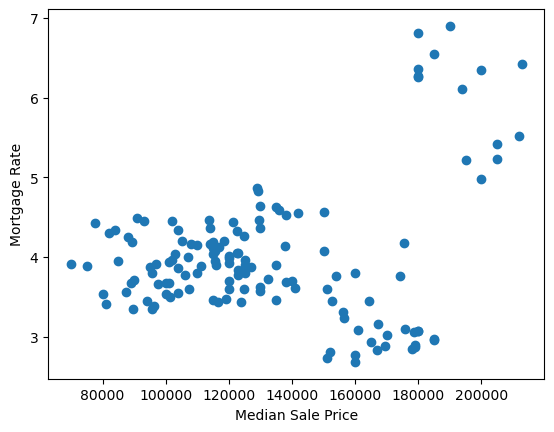

In [61]:
plt.scatter(sales_FRM['median_sale_price'],sales_FRM['30YrFRM'])
plt.xlabel('Median Sale Price')
plt.ylabel('Mortgage Rate')

print(f'Correlation Coefficient: {sales_FRM.corr()}')

Correlation Coefficient:                     30YrFRM  median_sale_price
30YrFRM            1.000000           0.262442
median_sale_price  0.262442           1.000000


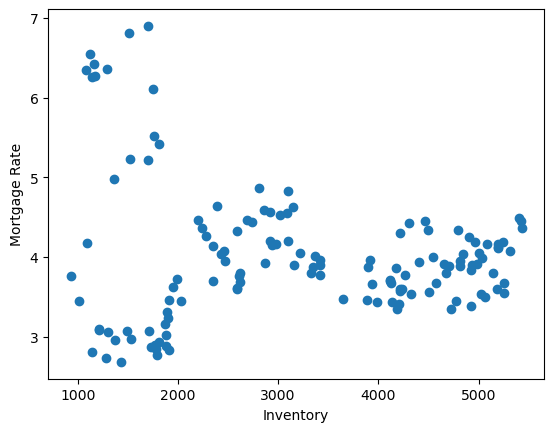

In [64]:
plt.scatter(inventory_FRM['inventory'],inventory_FRM['30YrFRM'])
plt.xlabel('Inventory')
plt.ylabel('Mortgage Rate')

print(f'Correlation Coefficient: {sales_FRM.corr()}')

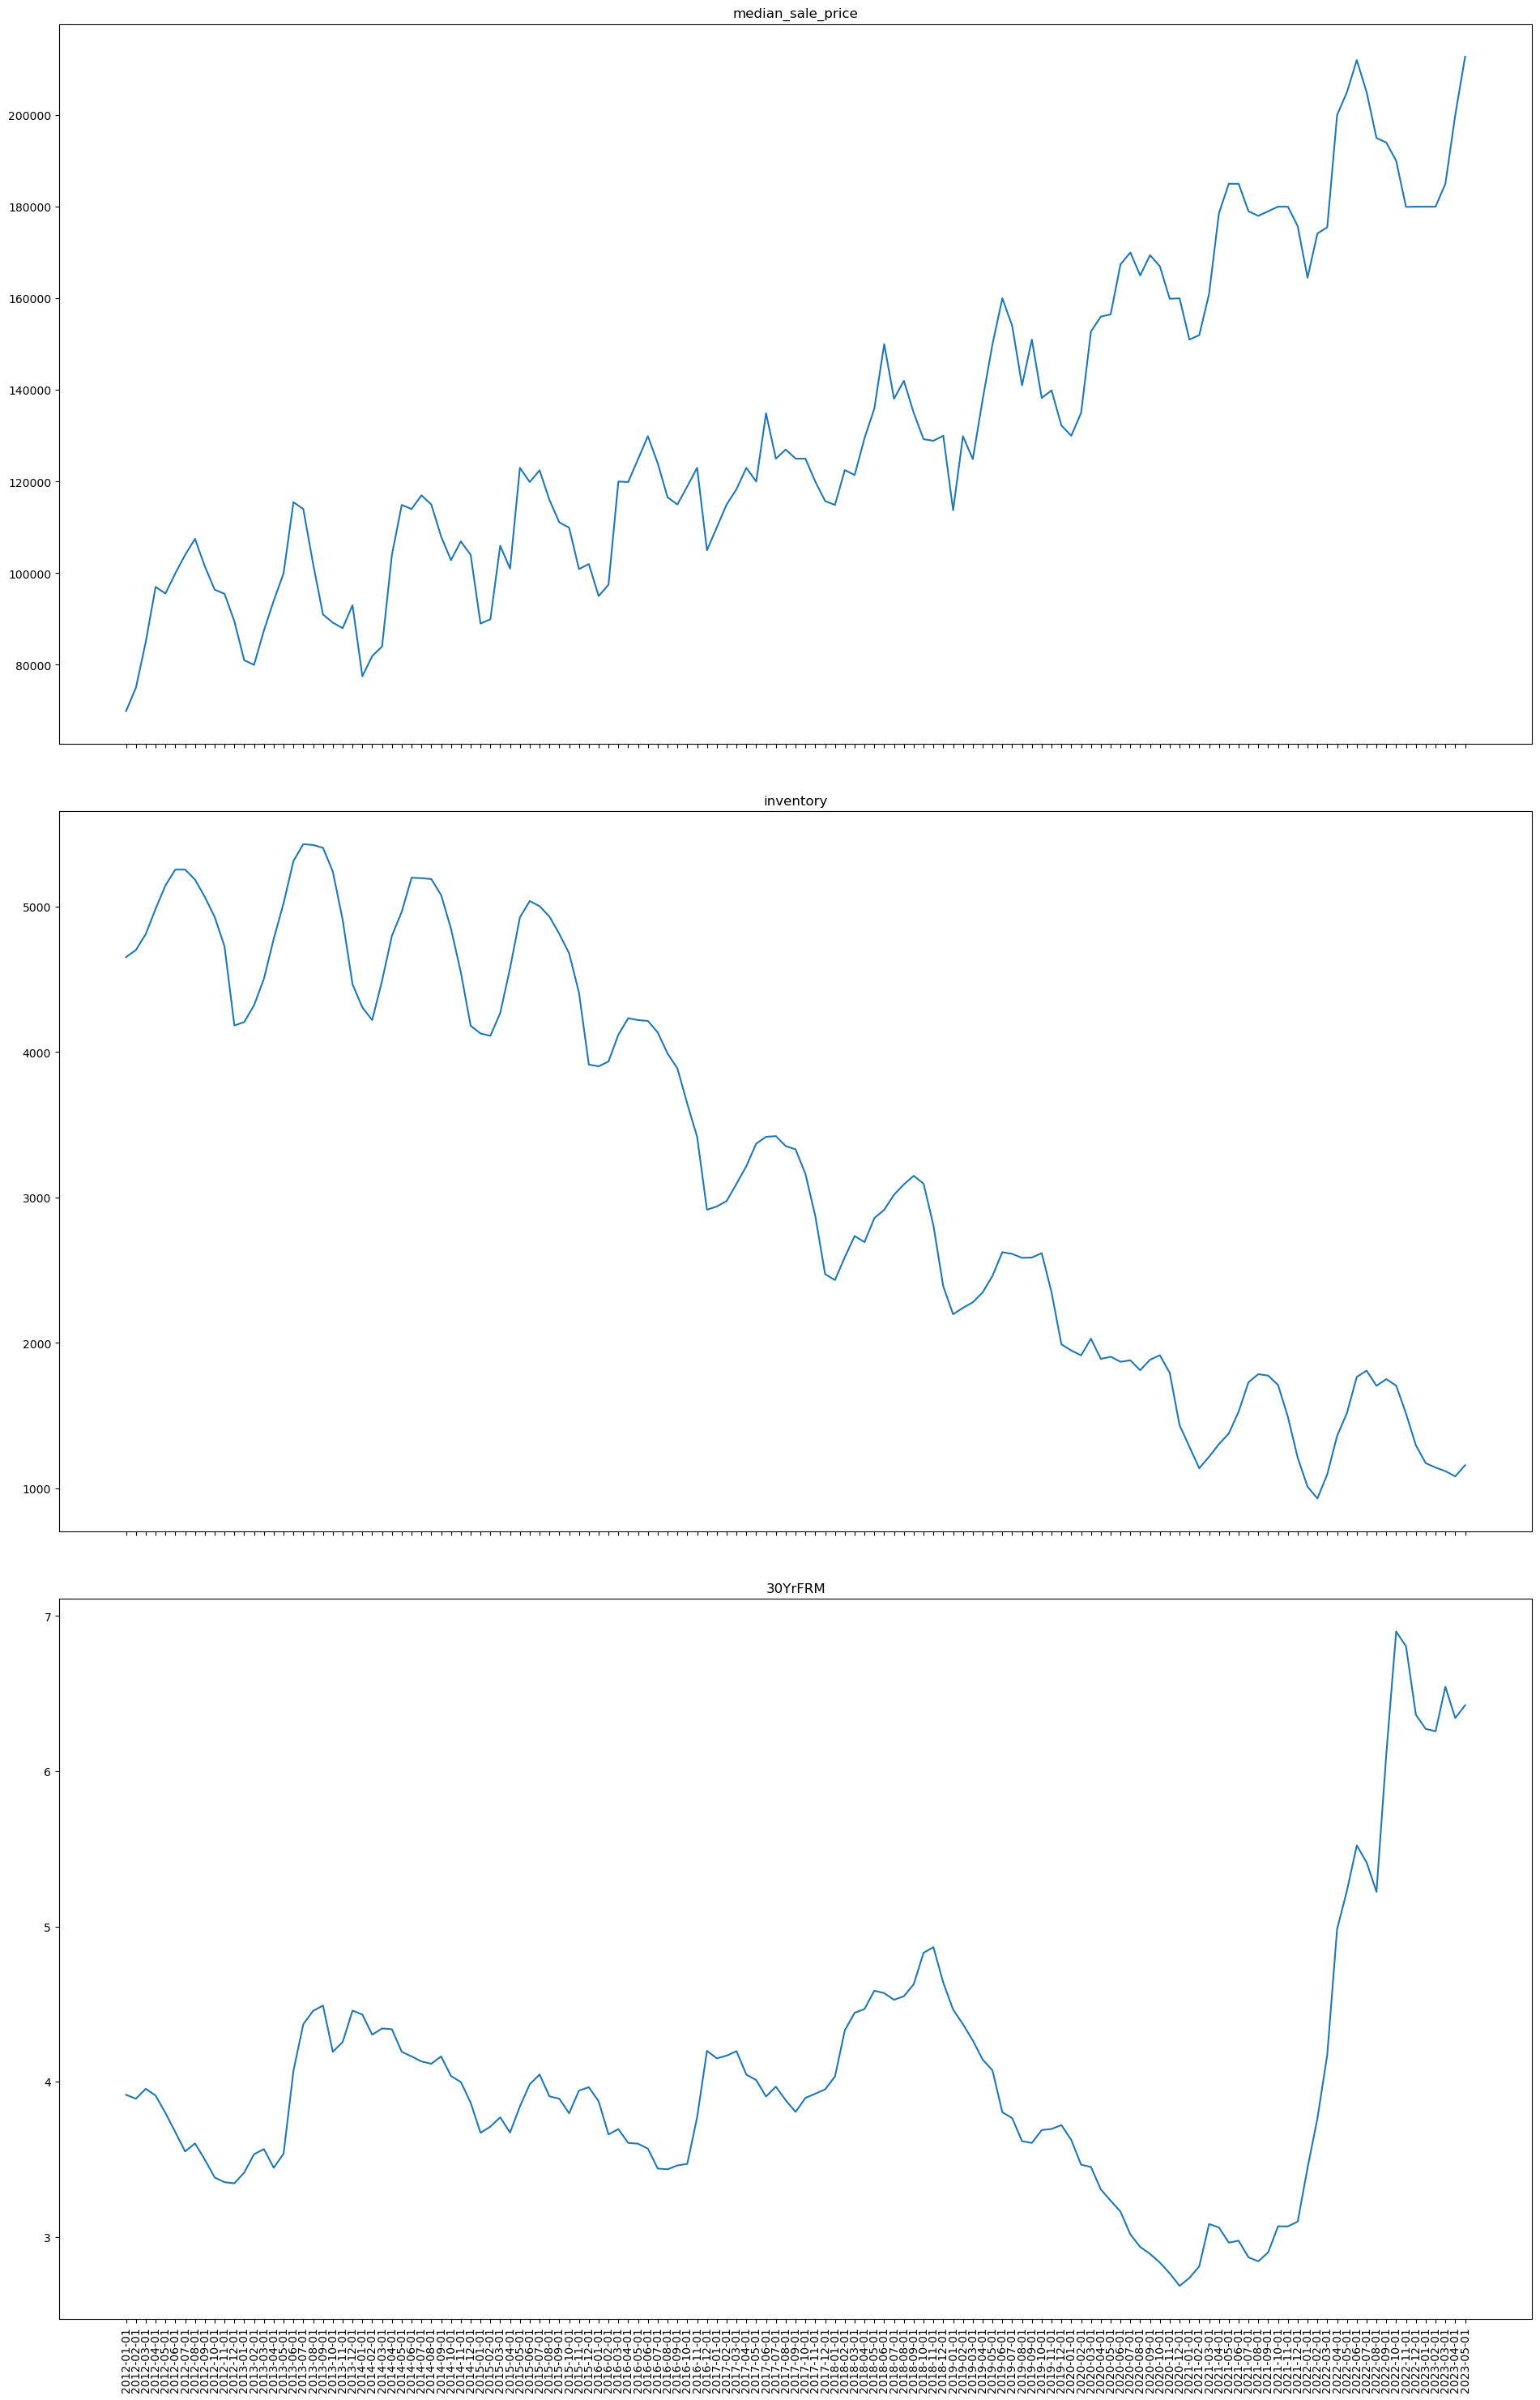

In [67]:
metrics_mom = [ 'median_sale_price',
            'inventory',
            '30YrFRM'
            ]



fig, ax = plt.subplots(3,1,sharex = True,figsize = (20,30))

fig.tight_layout(pad = 5)

ax = ax.flatten()

for ind,i in enumerate(metrics_mom):
    ax[ind].plot(dayton_residential_FRM['period_begin'],dayton_residential_FRM[i])
    ax[ind].set_title(i)
    ax[ind].set_xticklabels(dayton_residential_FRM['period_begin'],rotation = 90)

# Key Takeaways

### - There is a an inverse relationship between inventory and price. Basic Supply and Demand Structure.

**Questions about this**
- When does inventory/supply bottom out?
    - When mortgage rates are low, incentive to add to inventory via developers.
    - When mortgage rate are high, developers are less incentivized to build.
    - In final graph, inventories seasonal winter trench was higher this year than year before.
- What drives inventory?
    - Analysis doesn't show a strong relationship between inventory and mortgage rates.
    - Outside of recent years, mortgage rates have been relatively stable.
    - Intuition is that higher mortgage rates correlate to higher inventory (less people are wanting to buy when its more expensive)
    - Inventory could have a very low elasticity to mortgage rates (no relationship seen when mortage rates were stable) but will this spike in mortgage rates finally show an effect on inventory and how long would the lag be between mortgage rate spike and increase in inventory.

### - Townhome market is more unstable (most likely due to smaller sample)

### - Scatterplots show these mortgage rates are clear anomalies in past 10 years in relation to where pricing and inventory are at


## Next Steps

- Incorporate Businesses and Restaurants being built in area and look at relationships there.
- Forecasting Price, Inventory using the auto-regression with exogenous variables found in analysis.